In [1]:
#дополнительные библиотеки для установки
!pip install squarify

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from datetime import datetime, date
import squarify 
import scipy.stats as st
from scipy.stats import shapiro, norm

#для загрузки с Яндекс-Диска
import requests
from urllib.parse import urlencode

#для загрузки с docs.google
from io import BytesIO
import requests

# E-commerce — Выявление профилей потребления

Интернет-магазин товаров для дома «Пока все ещё тут» в срочном порядке ищет аналитиков. 

Вы поможете нашему магазину стать лучше, а клиентам — обустроить дом своей мечты. 

Наши ближайшие задачи — выявление профилей покупателей, а также полноценный анализ товарного ассортимента. «Пока все ещё тут» — мы создаём уют!

## Описание данных:

Датасет описывает транзакции интернет-магазина товаров для дома и быта **«Пока
все ещё тут»**.

Колонки:
- date — дата заказа;
- customer_id — идентификатор покупателя;
- order_id — идентификатор заказа;
- product — наименование товара;
- quantity — количество товара в заказе;
- price — цена товара.



## Декомпозиция
Цель работы: сегментирование покупателей интернет-магазина на основе истории их покупок

Задачи:
1. Сегментирование товарных позиций
    - это необходимо сделать для того, чтобы в дальнейшем провести сегментирование покупателей. В предоставленном датафрейме содержится обезличенная информация по истории продаж, которая касается непосредственно покупателей. Мы не знаем их половоую принадлежность, возраст, географическое местоположение и т.д. Поэтому отталкиваться при сегментировании покупателей можем только на сегменты товарных позиций, которые есть в заказах клиентов.
2. Проведение исследовательского анализа предоставленных данных:
    - корректность предоставленной в датафрейме информации;
    - поиск явных и неявных дубликатов;
    - работа с типом предоставленной информации;
    - аргументированный ввод / добавление информации, необходиомй для дальнейшего анализа.
3. Предварительный анализ данных:
    - общая информация;
    - кол-во выполненных заказов за период;
    - количество позиций в чеке;
    - средний чек;
    - динамика продаж;
    - анализ явных выбросов, влияющих на проведение анализа
4. Анализ продаж по категориям
    - распределение количества позиций внутри категорий;
    - анализ общей суммы покупок внутри категорий;
    - анализ количества проданных товаров внутри категорий;
    - средний чек внутри категорий;
    - сезонность продаж
5. Сегментирование покупателей на основе истории их покупок
    - RFM анализ
        - обоснование разделения на категории в сегментах recency / frequency / monetary
        - формирование RFM - таблицы
        - анализ полученных данных
        - работа с сегментами:
            - определение наиболее перспективных сегментов для увеличения продаж;
            - рекомендация по формам работы для сегментов
6. Гипотезы
    - есть ли различие величины среднего чека между сегментами
    - есть ли различие в среднем объемсе продаж между сегментами
7. Общие выводы и рекомендации, исходя из полученного анализа
_____________________________________ 

## !!!Итоговые выводы и рекомендации по проведенному анализу!!!

### Предварительный анализ данных
1. Период исследования с 01.10.2018 по 31.01.2020
2. После предобработки датафрейма:
    - проведена категоризация продаваемых товаров;
    - приведены к каноническому виду даты продаж;
    - добавлена информация, необходимая для анализа (средний чек, сумма покупки по товару, дата в формате месяц/год, сезон и т.д.)
    - удалены неявные дубликаты (дубли продаж, отличающиеся только датой продаж - сбой)
3. Всего в датафрейме отображены:
    - уникальных заказов - 3492;
    - уникальных клиентов - 2412
4. Продажи:    
    - медианная сумма заказа - 427.0 
    - медианные продажи в месяц - 244 884,59
    - в заказе в среднем 1,6 позиций
    - пик продаж пришёлся на 11.2018 года - 359 772
    - на дату окончания анализа - минимальные показатели за всеь период
#### Вывод
В целом виден отрицательный тренд по всем показателям: сумма продаж, величина среднего чека, количество позиций в чеке (глубина чека). Несмотря на то, что наблюдается рост количества заказов за последние три месяца с 217 до 269, при одновременно низком среднем чеке в 646,94, а так же всего 1 позиции в заказе - это ведет к минимальным продажам за исследуемый период.

### Анализ продаж по категориям товара
1. Произведена сегментация на 9 категорий:
    - семена, декоративные растения	
    - уборка, инвентарь, хранение	
    - семена, овощи/фрукты	
    - кухня	
    - искусственные растения
    - ванная
    - спальня
    - химия
    - семена, деревья
    
*!Поскольку в представленном файле отсутствует информация о складской стоимости товара, или о маржинальной надбавке к складской стоимости, то далее везде, где указаны суммы продаж - говорится не о полученной прибыли, а именно полученных от продаж суммах*

2. ТОР-3 представленности в прайсе по количеству товарных позиций:
    - семена, декоративные растения - 36%
    - уборка, инвентарь, хранение - 24%
    - семена, овощи/фрукты - 14%
    - TOP-3 занимает 74% от общего числа товарных позиций, на оставшиеся 6 категорий приходится 21% позиций

3. ТОР-3 по полученным суммам:
    - уборка, инвентарь, хранение - 49%
    - спальня - 13%
    - семена, декоративные растения - 12%
    - TOP-3 занимает 74% от полученных сумм, на оставшиеся 6 категорий приходится 26% полученной суммы
4.  ТОР-3 по суммарному количеству проданных товаров (объем продаж) входят:
    - уборка, инвентарь, хранение - 27%
    - семена, декоративные растения - 22%
    - искусственные растения - 17%
    - TOP-3 занимает 66% от суммарного количества проданных товвров, на оставшиеся 6 категорий приходится 34% полученной суммы

5. TOP-3 по стоимости 1 позиции (средний чек):
    - семена, деревья - 821,30
    - ванная - 495,04
    - уборка, инвентарь, хранение - 459,78
    

6. При исследовании сезонности продаж было учтено, что сезоны "осень", "зима" представленны в файле 5 месяцами (2018-2019 гг для "осени", 2019-2020 гг для "зимы"). Поэтому для адекватной оценки к количественным показателям товаров в эти периоды был применен понижающий коэффициент 0,6.

*! "осень-зима" - 5 месяцев, "весна-лето" - 3 месяца.* 

7. Сезонность продаж товаров по объему продаж
    - семена, овощи/фрукты - пик приходится на весну, затем падение более чем в 6,5 раз до самого следующего сезона
    - семена, декоративные растения - пик приходится на весну, но падение не такое сильное, как на семена овощи/фрукты - не более чем в 2-3 раза
    - уборка, инвентарь, хранение - рост продаж с весны и до осени, к зиме незначительное - падение
    - кухня - рост лето, осень, зима
    - искусственные растения - к осени
    - незначительный рост, либо отсуствие сезонности
        - спальня
        - ванная
        - семена, деревья
        - химия

8. Сезонность продаж товаров по сумме продаж
    - семена, овощи/фрукты - пик приходится на весну, затем падение до  следующего сезона
    - семена, декоративные растения - пик приходится на весну, но падение не такое сильное, как на семена овощи/фрукты - не более чем в 2-3 раза
    - уборка, инвентарь, хранение - рост продаж с весны и до осени, к зиме незначительное - падение
    - кухня - рост лето, осень
    - ванная - на протяжении всего года
    - искусственные растения - рост весна и осень, падение лето и зима
    - незначительный рост, либо отсуствие сезонности
        - спальня
        - семена, деревья
        - химия

9. ТОР-10 продаж по сумме продаж в разрезе категорий товаров
    - ТОП-10 по суммам продаж на 90% состоит из товаров из раздела **уборка, инвентарь, хранение**
    - в топе продаж сумки-тележки
    - максимальная сумма получена за товар "сумка-тележка 2-х колесная gimi argo синяя" - 50 405
10. ТОР-10 продаж по объему в разрезе категорий товаров
    - в ТОП-10 по количеству проданных товаров 
        - 40% - товары из категории **"уборка, инвентарь, хранение"**
        - 30% - товары из категории **"искусственные растения"**
        - 20% - товары из категории **"спальня"**
        - 10% - товары из категории **"ванная"**
    - максимально по количеству продан товар "муляж яблоко 9 см красное", категория "искусственные растения" - 618 шт.
 
#### Вывод
1. Товары, входящие в ТОП-3, обеспечивают до 75% суммы продаж интернет-магазина
2. Сезонность продаж характерна для всех групп товаров из ТОП-3
3. Самый большой средний чек в категории "семена, деревья". В то же время, как показал дальнейший анализ, в этой категории минмальные продажи за год. Целесообразно проанализировать маржинальность товаров этой категории, затраты на хранение и прочие расходы, для того, чтобы поставить вопрос о дальнейшей необходимости продаж.

### RFM-анализ
1. Клиенты были распределены на 6 сегментов, исходя из трех показателей:
- Recency - давность покупки от 01.02.2020
- Frequency — частота
- Monetary — деньги
2. Внутри сегментов клиенты распределились следующим образом:
    - **Лояльные**. Делают частые покупки на крупные суммы
    - **Требуют внимание**. Уровень давности выше среднего, частота и сумма покупок на среднем уровне. Могут не совершать покупки в последнее время
    - **Растущие**. Недавно покупали, но не крупные суммы
    - **В зоне риска**. Ранее часто тратили большие суммы, но давно не были у вас
    - **Новички**. В последнее время совершали покупки, необязательно крупные. Низкий уровень частоты и суммы покупок, т.к. они только недавно заметили ваш бренд
    - **Спящие**. Последняя покупка была очень давно, так же низкие чек и кол-во покупок
    
3. Распределение сегментов по количеству клиентов получилось следующим образом:
    - Растущие	1219 чел.	50.54%
    - Спящие	 767 чел.	31.80%
    - Лояльные	193 чел.	8,00%
    - Требуют внимание	95 чел.	3,94%
    - Новички	81 чел.	3.36%
    - В зоне риска	57 чел.	2.36%
   
4. Были выдвигнуты и проверены две гипотезы в каждой категории:
    - Гипотеза №1 "Средний чек"
        - Н0 ="Величина среднего чека в сегментах возможно НЕ РАЗЛИЧАЕТСЯ"
        - Н1 ="Величина среднего чека в сегментах возможно различается"
    - Гипотеза №2 "Объем продаж"
        - Н0 ="Объем продаж в сегментах возможно НЕ РАЗЛИЧАЕТСЯ"
        - Н1 ="Объем продаж в сегментах возможно различается"
        
5. Нормальность распределения сегментов были проверены при помощи критерия Шапиро-Уилка. Проверка показала, что распределение сегментов не является нормальным.

6. Проверка гипотезы проводилась непараметрическим тестом Уилкоксона-Манна-Уитни с учетом поправки Бонферрони, для того чтобы исключить возникновения ошибки первого рода. Всего было проведено 15 попарных проверок, в результате которых было получены следующие данные:
    - Гипотеза №1 = Н0 / Гипотеза №2 = Н0 - 0 совпадений
    - Гипотеза №1 = Н1 / Гипотеза №2 = Н0 - 4 совпадения
    - Гипотеза №1 = Н0 / Гипотеза №2 = Н1 - 3 совпадения
    - Гипотеза №1 = Н1 / Гипотеза №2 = Н1 - 8 совпадений

7. Исходя из того, что нет пары сегментов, у которых верными оказались одновременно нулевые гипотезы, можно говорить о корректности разделения сегментов

8. Были проанализированы категорийные продажи в разрезе сегментов по сезонным продажам (весна, лето, осень, зима), а так же в разрезе месяцев. На основании такого разделения внутри сегментов были выделены категории товаров, лидеры продаж в целом за исследуемый период, а так же по сезонно.
9. Отталкиваемся от следующих средних показателей по сегментам:
    - Recency - давность покупки = 216 дней
    - Frequency — частота = 1,45
    - Monetary — сумма покупки = 1 618,65
    - глубина чека = 2,28
    - средний чек = 1 168,8
#### Вывод

По итогам проверки гипотез, и исходя из показателей RFM по каждому сегменту возможны следующие рекомендации по удержани и увеличению продаж. 

##### **Растущие**
1. Поведение: покупали недавно, но не крупные суммы	
2. Характеристики
- 1 219 клиентов, 50.54% от клиентской базы
    - давность покупок - 134.17 дня;
    - частота покупки - 1.44 раз;
    - сумма покупки - 938.76;
    - глубина покупки (количество позиций в чеке) - 2.23
    - средний чек покупки - 744.50;
    - средняя сумма покупки в месяц - 71 522,00;
    - средняя сумма покупки за сезон - 234 852,00 
    - наибольшая сумма продаж - в летний сезон, наименьшая - в зимний;
3. Статистические тесты
    - по среднему чеку статистически НЕ отличаются от сегмента:
        * Новички;
    - по глубине чека  статистически НЕ отличаются от сегмента:
        * В зоне риска
4. Товарные категории, сезонность
    - ТОР-3 месяцев 
        - с наибольшими суммами продаж
                - 05.2019
                - 04.2019
                - 07.2019
        - с наименьшими суммами продаж
                - 11.2018
                - 10.2018
                - 01.2019
    - ТОР-3 по сумме продаж:
                - уборка, инвентарь, хранение;
                - семена, декоративные растения;
                - ванная.
    - по сезонам ТОР-3
        - весна:
              - семена, декоративные растения;
              - уборка, инвентарь, хранение;
              - семена, овощи/фрукты;
        - лето:
              - уборка, инвентарь, хранение;
              - семена, декоративные растения;
              - спальня;
        - осень:
              - уборка, инвентарь, хранение;
              - кухня;      
              - ванная;
        - зима:
              - уборка, инвентарь, хранение;     
              - ванная;
              - кухня
              
5. Как работать 

На данный момент сегмент "Растущие" составляет 50,54% от числа клиентов интернет-магазина. Последние три месяца сегмент показывает устойчивый прирост по продажам (с 46,7 тыс. в 11.2019 до 67,3 тыс. в 01.2020 + 44п.п.) Сегменту есть куда рости, т.к. максимальные продажи он показывал в 05.2019 - 141,6.тыс.

Основные зоны роста:
    - средний чек - он самый низкий, среди всех сегментов - всего 744,50. Увеличение среднего чека до среднего чека по сегментам (1 618,65 на 217%) позволит увеличить аналогично увеличить продажи по сегменту;
    - R - показатель - средняя давности покупки составляет 134,17 дня - более 4 месяцев, при частоте 1,34. Сократив показатель давности в два раза, до 65 дней(1 покупка минимум 1 раз в 2 месяца) так же даст прирост продаж по сегменту;

Как добиться:
    - по товарным категориям - обратить внимание на более дорогие категории - спальня, кухня, ванная. В предверии весеннего сезона эти категории показали наибольшую просадку в этих сегментах.
    - так же, для увеличения глубины чека, в предверии весеннего сезона стоит обратить внимание на акционные предложения 1+1 / 1+1=3. Клиенты акцентируют внимание на приобретении семян декоративных растений и уменьшают покупки в категории "уборка, инвентарь, хранение". Возможно продумать акцию по объединению продаж этих категорий товаров
    - для сокращения времени между заказми стоит обратить внимание на ограниченные по времени оферы. Сформировать предложения на основе истории предыдущих покупок
    
Очень перспективная группа, с хорошими реанимируемыми показателями

##### **Спящие**
1. Поведение: последняя покупка была очень давно, так же низкие чек и кол-во покупок

2. Характеристики:
      - 768 клиент, 31.84% от клиентской базы
            - давность покупок - 391.0 дня;
            - частота покупки - 1.29 раз;
            - сумма покупки - 1 430.63;
            - глубина покупки (количество позиций в чеке) - 2.20
            - средний чек покупки - 1 050.19;
     - средняя сумма покупки в месяц - 156 764,00;
     - средняя сумма покупки за сезон - 241 256,00 
     - наибольшие продажи в зимний сезон, наименьшие - в весенний

3. Статистические тесты
    - по среднему чеку статистически НЕ отличаются от сегментов:
        * Новички;
        * Требуют внимание
        
4. Товарные категории, сезонность:
    - ТОР-3 месяцев 
        - с наибольшими суммами продаж
            - 10.2018
            - 12.2018
            - 02.2019
        - с наименьшими суммами продаж
            - 01.2019
            - 03.2019
            - 04.2019
    - ТОР-3 по сумме продаж:
            - уборка, инвентарь, хранение;
            - ванна;
            - кухня;
    - По сезонам ТОР-3
        - весна:
              - семена, декоративные растения;
              - уборка, инвентарь, хранение;
              - ванная;
        - осень:
              - уборка, инвентарь, хранение;
              - кухня;      
              - спальня;
        - зима:
              - уборка, инвентарь, хранение;     
              - ванная;
              - кухня
              
5. Как работать 

Самая пародоксальная группа! Она составляет 1/3 от существующей клиентской базы, но при этом последние покупки совершались до 05.2019 - более 9 месяцев назад. При этом покупатели этого сегмента имели неплохие количественные показатели, чуть ниже средних по интернет-магазину.

Основные зоны роста:
   - вернуть клиентов! в ручном режиме проверить актуальность базы. Удалить несуществующих, мертвых клиентов (касается в первую очередь юридических лиц! не физиков!)
   - эти клиенты так давно покупали в интернет-магазине, что уже забыли все наши преимущества и предложения. 
   - после актуализации базы подготовить общие акционные предложения и скидки с наиболее привлекательными товарами. В целом в наступающем весеннем периоде отлично покупаются товары групп "- семена, декоративные растения", а так же "уборка, инвентарь, хранение". Так же стоит обратить внимание на товары категорий "спальня", "кухня" - т.к. они так же присутсвовали в ранее оплаченных чеках.
   
**!NB** Две группы - "Растущие" и "Спящие"- составляют более 80% клиентской базы. Вопрос актуальности существующей базы, с учетом:
   - отсуствия продаж по группе "Спящие" с 05.2019
   - падения продаж с 05.2019 к 11.2019 в 3 раза в группе "Растущие"

**является очень актуальным**.

##### **Лояльные"**
1. Поведение: делают частые покупки на крупные суммы

2. Характеристики:
   - 192 клиента, 7.96% от клиентской базы
   - давность покупок - 45.05 дня;
   - частота покупки - 2.08 раз;
   - сумма покупки - 4 169.33;
   - глубина покупки (количество позиций в чеке) - 2.08
   - средний чек покупки - 2035.58;
   - средняя сумма покупки в месяц - 50 118,00;
   - средняя сумма покупки за сезон - 141 448,00 
   - наибольшие продажи в зимний сезон, наименьшие - в весенний 
   
3. Статистические тесты
    - по глубине чека  статистически НЕ отличаются от сегментов:
        * Требуют внимание
        * В зоне риска
        
4. Товарные категории, сезонность:
    - ТОР-3 месяцев 
    - с наибольшими суммами продаж
        - 12.2019
        - 01.2020
        - 11.2019
    - с наименьшими суммами продаж
        - 05.2019
        - 08.2019
        - 10.2019
    - ТОР-3 по сумме продаж:
        - уборка, инвентарь, хранение;
        - спальня;
        - ванная.
    - по сезонам ТОР-3
        - весна:
          - уборка, инвентарь, хранение;
          - ванная;
          - спальня;
        - лето:
          - уборка, инвентарь, хранение;
          - спальня;
          - ванная;      
        - осень:
          - уборка, инвентарь, хранение;
          - спальня;
          - ванная; 
        - зима:
          - уборка, инвентарь, хранение;
          - спальня;
          - ванная
          
5. Как работать
Сегмент "Лояльные" - группа, которая надежно совершает продажи, делая часто покупки на крупные суммы. Единственный и значимый недостаток этого сегмента - его величина. "Лояльные" клиенты составляют 7,8% от общего количестве клиентской базы.

Основные зоны роста:
    - этот сегмент, по сути, является лучшей рекламой интернет-магазина. Работа над лояльностью - акции для "самых наших дорогих клиентов", бонусы - в обмен на отзыв в соцсетях, либо на онлайн-площадках.
    - рассмотреть возможность выделение этих клиентов в сегмент "премиального обслуживания" с дополнительными сервисами, например, основные категории товаров в этом сегменте - ванная, спальня, кухня. Покупка таких товаров подразумевает доставку, сделать её, например, бесплатной + сервис заноса в квартиру. 
    - работа со средним чеком и глубиной чека - сосредоточиться на рекламе более дорогих позиций.

##### **Требуют внимание**
1. Поведение: уровень давности выше среднего, частота и сумма покупок на среднем уровне. Могут не совершать покупки в последнее время.

2. Характеристики: 
    - 95 клиентов, 3.65% от клиентской базы
    - давность покупок - 207.38 дня;
    - частота покупки - 1.85 раза;
    - сумма покупки - 3 570.31;
    - глубина покупки (количество позиций в чеке) - 4.16
    - средний чек покупки -  2 934,00;
    - средняя сумма покупки в месяц - 33 918,00;
    - средняя сумма покупки за сезон - 78 856,00 
    - наибольшие продажи в летний сезон, наименьшие - в зимний
    
3. Статистические тесты
    - по среднему чеку статистически НЕ отличаются от сегмента:
        * Спящие;
    - по глубине чека  статистически НЕ отличаются от сегментов:
        * Лояльные
        * В зоне риска
        
4. Товарные категории, сезонность:
    - ТОР-3 месяцев 
    - с наибольшими суммами продаж
        - 06.2019
        - 07.2019
        - 05.2019
    - с наименьшими суммами продаж
        - 03.2019
        - 02.2019
        - 01.2019
    - ТОР-3 по сумме продаж:
        - уборка, инвентарь, хранение;
        - спальня;
        - семена, декоративные растения;
    - По сезонам ТОР-3
        - весна:
          - уборка, инвентарь, хранение;
          - семена, декоративные растения;
          - искусственные растения;
        - лето:
          - уборка, инвентарь, хранение;
          - спальня;
          - семена, декоративные растения;      
        - осень:
          - уборка, инвентарь, хранение;
          - ванная; 
          - семена, декоративные растения;
        - зима:
          - семена, декоративные растения;
          - уборка, инвентарь, хранение;

5. Как работать:
Первое, на что стоит обратить внимание, что, в этом сегменте нет покупок после 10.2019, при этом в сегменте находится 3,94% клиентов (95 человек). Т.е. почти 100 клиентов не совершали ни одной покупки на протяжении последних 3 месяцев. Если посмотреть на график сумм продаж по месяцам - с 04.2019 по 08.2019 сумма покупок превышала среднии продажи. 
09.2019-10.2019 спад продаж почти в 2 раза, по сравнению с 06.2019 (пиком продаж). 

Основные зоны роста:
 - как и впредыдущих сегментах необходимо начать с актуализации клиентской базы. В ручном режиме понять, насколько "живыми" являются клиенты, при необходимости, провести корректировку.
    - ранее у этого сегмента был хороший средний чек - 2,8 тыс. с глубиной в 4,17 позиции, поэтому сейччас реанимация должна быть направлена на возобновление сотрудничества, через предложение ограниченных по времени оферов. 
    - При формировании предложения, рассмотреть историю покупок. В этом сегменте в любой сезон в ТОП-3 всегда входят категории "Уборка, инвентарь, хранение", "Семена, декоративные растения". Поэтому перед весенным сезоном акцентировать внимание на позициях из этих сегментов - для быстрой реанимации сегмента
    
##### **Новички**
1. Поведение: В последнее время совершали покупки, необязательно крупные. Низкий уровень частоты и суммы покупок, т.к. они только недавно заметили интернет-магазин.

2. Характеристики:
     - 81 клиент, 3.94% от клиентской базы
     - давность покупок - 84.89 дня;
     - частота покупки - 1.00 раз;
     - сумма покупки - 898.07;
     - глубина покупки (количество позиций в чеке) - 1.01
     - средний чек покупки - 898.07;
     - глубина покупки (количество позиций в чеке) - 1.01
     - средний чек покупки - 898.07;
     - средняя сумма покупки в месяц - 18 186,00

     
3. Статистические тесты
    - по среднему чеку статистически НЕ отличаются от сегмента:
        * Растущие;
        * Спящие;
        
4. Товарные категории, сезонность:
    - ТОР-3 по сумме продаж:
        - уборка, инвентарь, хранение;
        - семена, декоративные растения;
        - ванная

5. Как работать:

Доля Новичков - 3,36%. В этом сегменте клиенты сделали покупки с ноября 2019 года по январь 2020, с частотой равной 1, и больше не обращались в интернет-магазин. По всей видимости, по какой-то причине, клиенты остались неудовлетворенны качеством товаров / качеством предоставленной услуги / способом оформления и доставки товара. 

    - для реанимации клиентов - дать ограниченную по времени крупную скидку на следующую первую покупку. Приурочить её к одному из ближайших праздников - 14 февраля, 23 февраля, 8 марта.
    
    - постараться через анкеты обратной связи понять причину прекращения сотрудничества клиентов с интернет-магазином. Исходя из полученной информации - скорректировать работу с Новичками.

##### **В зоне риска**
1. Поведение: ранее часто тратили большие суммы, но давно не были у вас.

2. Характеристики:
     - 57 клиента, 2.36% от клиентской базы
     - давность покупок - 347.80 дня;
     - частота покупки - 1.68 раз;
     - сумма покупки - 8 116.68;
     - глубина покупки (количество позиций в чеке) - 4.04
     - средний чек покупки - 6563.62;
     - средняя сумма покупки в месяц - 38 554,00;
     - средняя сумма покупки за сезон - 84 251,00 
     - наибольшие продажи в осенний сезон, наименьшие - в летний

3. Статистические тесты
    - по глубине чека  статистически НЕ отличаются от сегментов:
            * Растущие
            * Лояльные
            * Требуют внимание
            
4. Товарные категории, сезонность:
    - ТОР-3 месяцев 
    - с наибольшими суммами продаж
        - 11.2018
        - 04.2019
        - 12.2018
    - с наименьшими суммами продаж
        - 03.2019
        - 06.2019
        - 10.2019
    - ТОР-3 по сумме продаж:
        - уборка, инвентарь, хранение;
        - кухня;
        - спальня;
    - по сезонам ТОР-3
        - весна:
          - уборка, инвентарь, хранение;
          - спальня
          - кухня;
        - лето:
          - ванная;  
          - уборка, инвентарь, хранение;
          - семена, декоративные растения;      
        - осень:
          - уборка, инвентарь, хранение;
          - кухня;
          - спальня;
        - зима:
          - уборка, инвентарь, хранение;
          - кухня;
          - семена, декоративные растения;
5. Как работать:
Группа с самым большим средним чеком - 6563,62. Но все продажи были сделаны 2018 году, а так же в 04.2019. После этого суммы продаж минимальные, а после 10-2019 - нет ни одной продажи. Группа может быть реанимирована, в ней всего 57 клиентов, поэтому 
   - для них возможна подготовка персонализированных предложений;
   - после актуализации информации о клиентах, возможно так же предложить хорошую скидку на ближайшую покупку. Как повод - ближайшие календарные праздники

__________________________________________ 




## Предобработка данных

Загрузка файла с docs.google

In [4]:

spreadsheet_id = '1Qa0swF2o9aEtD4kpfCe-Tkc9ka64KsAseZP6z7RMN9k'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data = pd.read_csv(BytesIO(r.content))
data.head(10)

,date,customer_id,order_id,product,quantity,price,Unnamed: 6
0,2019032114,036d75ea-b633-41a8-8974-3f84fee8c65e,70822,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,1,2399.0,5
1,2020012917,4228e34b-dcba-4df8-ae70-b282e84a1edb,110547,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,1,2399.0,5
2,2019081602,2eef43dd-ad75-4e55-a46d-edea403bcb6b,72306,Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776,1,2399.0,5
3,2018101509,092ef2d7-30d2-4d15-9c40-35af6973f28b,68650,Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,1,2324.0,5
4,2019021322,aa4058c4-7f20-4df1-ab65-24d47011026b,70250,Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,1,1874.0,5
5,2019042008,16838b36-762a-474d-bda4-bad95f8d7813,71209,Автоматическая щетка Leifheit для мытья окон с...,1,7229.0,8
6,2020010811,db6caedb-e231-4adc-bcd0-e45b8992f3da,107979,Автоматическая щетка Leifheit для мытья окон с...,1,7229.0,8
7,2019042817,cce13789-408b-44e1-8147-3c74dc393bf1,14701,Агератум рассада однолетних цветов в кассете п...,2,210.0,2
8,2019042915,cce13789-408b-44e1-8147-3c74dc393bf1,14701,Агератум рассада однолетних цветов в кассете п...,2,210.0,2
9,2018100600,859ff7b8-ec8c-4d6b-8c38-345788d8766f,68547,Адиантум Лиза d-12 см,1,412.0,2


Начало предобработки файла

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
 6   Unnamed: 6   7474 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 408.9+ KB


In [6]:
data['price']=data['price'].astype(int)
data['date'] = pd.to_datetime(data['date'], format = '%Y%m%d%H')

In [7]:
data['product']=data['product'].str.lower()
data.duplicated().sum()

0

In [8]:
data.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
Unnamed: 6     0
dtype: int64

Определим, есть ли в файле неявные дубликаты. 

Под неявными дубликатами можем понимать те данные, у которых совпадают значения по полям *customer_id*, *order_id*, *produkt_id*, но при этом различаются данные по полю *date*. Например,

In [9]:
data[data['customer_id']=='b80e4826-7218-4bf9-ac08-eb2c81ab3f62'].sort_values(by='date')

,date,customer_id,order_id,product,quantity,price,Unnamed: 6
3850,2018-10-05 00:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315,1
4043,2018-10-05 00:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по ...,1,162,1
3987,2018-10-05 00:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете п...,1,207,1
3851,2018-10-23 13:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315,1
4044,2018-10-23 13:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по ...,1,162,1
3988,2018-10-23 13:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете п...,1,207,1
3852,2018-10-28 19:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315,1
4045,2018-10-28 19:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по ...,1,162,1
3991,2018-10-28 19:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете п...,1,207,1
4046,2018-11-02 14:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по ...,1,162,1


Т.е., видимо при слиянии файла, произошло наложение логов. Один и тот же заказ продублировался 7 раз. Различие идет только по полю *date*. 

Такие "дубли" будут отредактированы. Оставлены будут более поздние по времени значения - так как можно считать факт совершения покупки по самой поздней дате. Такое уточнение необходимо, для того, чтобы корректно разнести осуществленные продажи по месяцам. 

In [10]:
data.duplicated(subset=['customer_id', 'order_id', 'product']).sum()

1886

Следовательно, в датафрейме содержится 1886 дубликатов. Удалим их, приняв за верные те, что содержат более позднюю дату

In [11]:
data=data.drop_duplicates(subset=['customer_id', 'order_id', 'product'], keep='last', ignore_index=True)
data.head()

,date,customer_id,order_id,product,quantity,price,Unnamed: 6
0,2019-03-21 14:00:00,036d75ea-b633-41a8-8974-3f84fee8c65e,70822,tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399,5
1,2020-01-29 17:00:00,4228e34b-dcba-4df8-ae70-b282e84a1edb,110547,tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399,5
2,2019-08-16 02:00:00,2eef43dd-ad75-4e55-a46d-edea403bcb6b,72306,tepмокружка avex freeflow 700 мл сталь avex0776,1,2399,5
3,2018-10-15 09:00:00,092ef2d7-30d2-4d15-9c40-35af6973f28b,68650,tepмокружка avex recharge 500 мл голубой avex0681,1,2324,5
4,2019-02-13 22:00:00,aa4058c4-7f20-4df1-ab65-24d47011026b,70250,tepмокружка avex recharge 500 мл голубой avex0681,1,1874,5


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5588 entries, 0 to 5587
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5588 non-null   datetime64[ns]
 1   customer_id  5588 non-null   object        
 2   order_id     5588 non-null   int64         
 3   product      5588 non-null   object        
 4   quantity     5588 non-null   int64         
 5   price        5588 non-null   int64         
 6   Unnamed: 6   5588 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 305.7+ KB


Проверим результат, на примере, рассмотренном выше *customer_id='b80e4826-7218-4bf9-ac08-eb2c81ab3f62'*

In [13]:
data[data['customer_id']=='b80e4826-7218-4bf9-ac08-eb2c81ab3f62'].sort_values(by='date')

,date,customer_id,order_id,product,quantity,price,Unnamed: 6
3233,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315,1
3337,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете п...,1,207,1
3380,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по ...,1,162,1


Действительно видим, что остался самый поздний вариант заказа. Количество записей так же стало меньше - 5588 строк.

Теперь поработаем с категорией товара - значение, которое было добавлено вручную

In [14]:
data=data.rename(columns={'Unnamed: 6' : 'category'})

На основании информации в разделе *category* добавим еще один столбец *category_name* с названием категорий товаров

In [15]:
data['category_name']=' '
for n in range(len(data)):
    if data.loc[n,'category']==1:
        data.loc[n,'category_name']='семена, овощи/фрукты'
    elif data.loc[n,'category']==2:
        data.loc[n,'category_name']='семена, декоративные растения'
    elif data.loc[n,'category']==3:
        data.loc[n,'category_name']='семена, деревья'
    elif data.loc[n,'category']==4:
        data.loc[n,'category_name']='химия'
    elif data.loc[n,'category']==5:
        data.loc[n,'category_name']='кухня'
    elif data.loc[n,'category']==6:
        data.loc[n,'category_name']='ванная'
    elif data.loc[n,'category']==7:
        data.loc[n,'category_name']='спальня'
    elif data.loc[n,'category']==8:
        data.loc[n,'category_name']='уборка, инвентарь, хранение'
    else: 
        data.loc[n,'category_name']='искусственные растения'
        
data.head(10)        

,date,customer_id,order_id,product,quantity,price,category,category_name
0,2019-03-21 14:00:00,036d75ea-b633-41a8-8974-3f84fee8c65e,70822,tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399,5,кухня
1,2020-01-29 17:00:00,4228e34b-dcba-4df8-ae70-b282e84a1edb,110547,tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399,5,кухня
2,2019-08-16 02:00:00,2eef43dd-ad75-4e55-a46d-edea403bcb6b,72306,tepмокружка avex freeflow 700 мл сталь avex0776,1,2399,5,кухня
3,2018-10-15 09:00:00,092ef2d7-30d2-4d15-9c40-35af6973f28b,68650,tepмокружка avex recharge 500 мл голубой avex0681,1,2324,5,кухня
4,2019-02-13 22:00:00,aa4058c4-7f20-4df1-ab65-24d47011026b,70250,tepмокружка avex recharge 500 мл голубой avex0681,1,1874,5,кухня
5,2019-04-20 08:00:00,16838b36-762a-474d-bda4-bad95f8d7813,71209,автоматическая щетка leifheit для мытья окон с...,1,7229,8,"уборка, инвентарь, хранение"
6,2020-01-08 11:00:00,db6caedb-e231-4adc-bcd0-e45b8992f3da,107979,автоматическая щетка leifheit для мытья окон с...,1,7229,8,"уборка, инвентарь, хранение"
7,2019-04-29 15:00:00,cce13789-408b-44e1-8147-3c74dc393bf1,14701,агератум рассада однолетних цветов в кассете п...,2,210,2,"семена, декоративные растения"
8,2018-10-06 00:00:00,859ff7b8-ec8c-4d6b-8c38-345788d8766f,68547,адиантум лиза d-12 см,1,412,2,"семена, декоративные растения"
9,2018-10-11 18:00:00,cfddc890-ecaf-4f04-ab0f-ffa76c79fe63,68615,азалия индика биколор d-12 см,1,307,2,"семена, декоративные растения"


Добавим ещё один столбец *sale* - равен произведению *quantity* на *price*. Это необходимо, чтобы рассчитать цену заказа

In [16]:
data['sale']=data['quantity']*data['price']
data.head()

,date,customer_id,order_id,product,quantity,price,category,category_name,sale
0,2019-03-21 14:00:00,036d75ea-b633-41a8-8974-3f84fee8c65e,70822,tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399,5,кухня,2399
1,2020-01-29 17:00:00,4228e34b-dcba-4df8-ae70-b282e84a1edb,110547,tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399,5,кухня,2399
2,2019-08-16 02:00:00,2eef43dd-ad75-4e55-a46d-edea403bcb6b,72306,tepмокружка avex freeflow 700 мл сталь avex0776,1,2399,5,кухня,2399
3,2018-10-15 09:00:00,092ef2d7-30d2-4d15-9c40-35af6973f28b,68650,tepмокружка avex recharge 500 мл голубой avex0681,1,2324,5,кухня,2324
4,2019-02-13 22:00:00,aa4058c4-7f20-4df1-ab65-24d47011026b,70250,tepмокружка avex recharge 500 мл голубой avex0681,1,1874,5,кухня,1874


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5588 entries, 0 to 5587
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5588 non-null   datetime64[ns]
 1   customer_id    5588 non-null   object        
 2   order_id       5588 non-null   int64         
 3   product        5588 non-null   object        
 4   quantity       5588 non-null   int64         
 5   price          5588 non-null   int64         
 6   category       5588 non-null   int64         
 7   category_name  5588 non-null   object        
 8   sale           5588 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 393.0+ KB


Проверим так же датафайл на наличие заказов совершенных более чем одним покупателем (ошибка ввода: один заказ - два покупателя)

In [18]:
double_users = data.groupby('order_id').agg({'customer_id' : 'nunique'}).reset_index().query('customer_id>1')['order_id'].unique()
data = data.query('order_id not in @double_users')

# проверим удаление
data.groupby('order_id').agg({'customer_id' : 'nunique'}).query('customer_id>1').count()

customer_id    0
dtype: int64

### **Общий вывод по разделу "Предобработка данных**
Выгрузил файл
1. Вывел информацию по датасету
- Всего 9 столбцов, 5588 строк. 
- Пустых/незаполненных ячеек нет
- значения в столбце date привел к формату datetime
- значения в столбце price привел к формату int32

2. Были удалены неявные дубликаты
3. Отдельно была проведена обработка по категоризации проданных товаров, добавлен столбец с расшифровкой категоризации
4. Добавлен столбец с ценой за объем купленного товара (стоимость 1 ед.товара х на количество)
5. Проверены на уникальность связка -  заказ = покупатель, нет заказов с несколькими покупателями.

Предоставленный датафрейм заполнен корректно, содержащаяся информация обладет необходимой полнотой для работы.

## Предварительный анализ данных
### Общая информация

In [19]:
print('За период с', 
      data['date'].min(), 
      'по', data['date'].max(),
      '\nСделан',data['order_id'].nunique(), 'заказ')

За период с 2018-10-01 00:00:00 по 2020-01-31 15:00:00 
Сделан 3492 заказ


In [20]:
#информация по количественным характеристикам заказов
print('Сумма заказа варьируется от', data.groupby('order_id')['price'].sum().min(), 
      'руб. до', data.groupby('order_id')['price'].sum().max(), 
      'руб. \nМедианная стоимость заказа составляет', round(data.groupby('order_id')['price'].sum().median(), 2), 'руб',
      '\n',
     '\nВ заказе от', data.groupby('order_id')['product'].count().min(),
      'до', data.groupby('order_id')['product'].count().max(), 'позиции',
     '\nМедианное количество позиций в заказе равно', round(data.groupby('product')['price'].count().median(), 2), 'шт.')

Сумма заказа варьируется от 9 руб. до 17060 руб. 
Медианная стоимость заказа составляет 427.0 руб 
 
В заказе от 1 до 51 позиции 
Медианное количество позиций в заказе равно 1.0 шт.


#### **Вывод по разделу** 
Интересная ситуация:
- сумма заказа меняется от 9 до 17 060 руб., при этом медианная сумма равна 427 руб.
- количество позиций в заказе меняется от 1 до 51  шт. При этом медианное количество составляет всего 1 позиции в заказе.




### Количество выполненных заказов

Добавим столбец, в котором указан месяц и год покупки, для того чтобы проанализировать, как менялось количество выполненных заказов за период

In [21]:
data['date_mY']=data['date'].dt.to_period('M')

cust_count_year=data.groupby(['date_mY'])['order_id'].nunique().reset_index()
cust_count_year

,date_mY,order_id
0,2018-10,237
1,2018-11,204
2,2018-12,276
3,2019-01,167
4,2019-02,286
5,2019-03,243
6,2019-04,264
7,2019-05,176
8,2019-06,160
9,2019-07,197


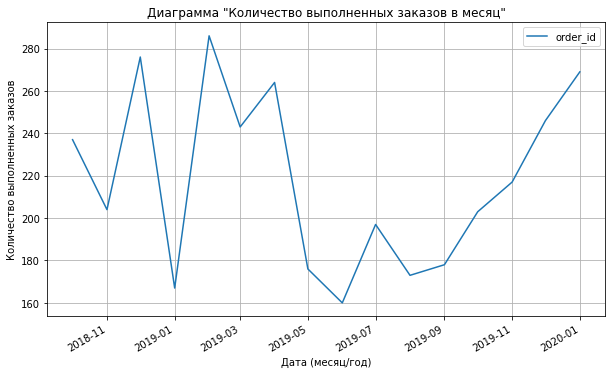

In [22]:
cust_count_year.plot(x='date_mY',
                    y='order_id',
                    figsize=(10,6),
                    grid=True,
                    x_compat=True)
plt.title('Диаграмма "Количество выполненных заказов в месяц"')
plt.xlabel('Дата (месяц/год)')
plt.ylabel('Количество выполненных заказов')
plt.show()

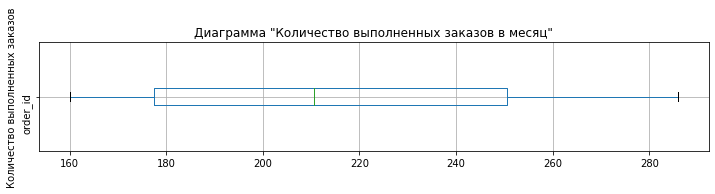

In [23]:
cust_count_year.boxplot(column=['order_id'], 
                        vert = False, 
                        figsize = (12, 2), 
                        rot = 90)
plt.title('Диаграмма "Количество выполненных заказов в месяц"')
plt.ylabel('Количество выполненных заказов')
plt.show()

In [24]:
perc = [ .80, .90, .95, .99]
cust_count_year['order_id'].describe(percentiles=perc)

count     16.000000
mean     218.500000
std       42.180564
min      160.000000
50%      210.500000
80%      264.000000
90%      272.500000
95%      278.500000
99%      284.500000
max      286.000000
Name: order_id, dtype: float64

In [25]:
cust_count_year['order_id'].median()

210.5

#### **Вывод по разделу**
1. Медианное количество выполненных заказов составляет 210.5 заказов/месяц, среднее арифметическое - 218,50 заказ/месяц
2. Минимальное количество выполненных заказов равно 160 - в июле 2019 года
3. Максимальное количество равно 286 - февраль 2019 года
4. Исходя из графика, невозможно сказать, насколько ассортимент магазина подвержен сезонности
5. Начиная с сентября 2019 года количество выполненных заказов увеличивается
6. Все значения находятся в рамках "ящика с усами", выбросов и аномалий не наблюдается

### Количество позиций в чеке

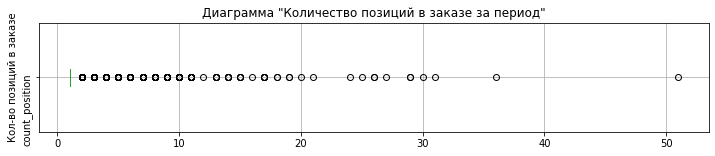

In [26]:
gr_count=data.groupby('order_id')['product'].count().reset_index(name='count_position')

gr_count.boxplot(column=['count_position'],vert = False, 
                        figsize = (12, 2), 
                        rot = 90)
plt.title('Диаграмма "Количество позиций в заказе за период"')
plt.ylabel('Кол-во позиций в заказе')
plt.show()

In [27]:
perc = [ .80, .90, .95, .99]
gr_count['count_position'].describe(percentiles=perc)

count    3492.000000
mean        1.581329
std         2.513550
min         1.000000
50%         1.000000
80%         1.000000
90%         2.000000
95%         5.000000
99%        13.000000
max        51.000000
Name: count_position, dtype: float64

Если рассматривать все заказы в разрезе "количество позиций в заказе":
- среднее количество позиций в заказе равно 1,58
- все заказы, в которых более 5 позиций можно считать аномалиям
- всего лишь 5% от общего числа выполненных заказов содержат в себе от 5 до 51 позиции

Теперь рассмотрим, как распределяется количество позиций в чеке по месяцам

In [28]:
#группируем по кол-ву позиций внутри месяца по заказам
gr_count=data.groupby(['date_mY','order_id'])['product'].count().reset_index(name='count_position')


gr_count_year=round(gr_count.groupby('date_mY')['count_position'].mean().reset_index(name='count_position'), 2)
gr_count_year

,date_mY,count_position
0,2018-10,2.02
1,2018-11,2.11
2,2018-12,1.10
3,2019-01,1.10
4,2019-02,1.26
5,2019-03,1.67
6,2019-04,2.55
7,2019-05,3.89
8,2019-06,2.03
9,2019-07,1.58


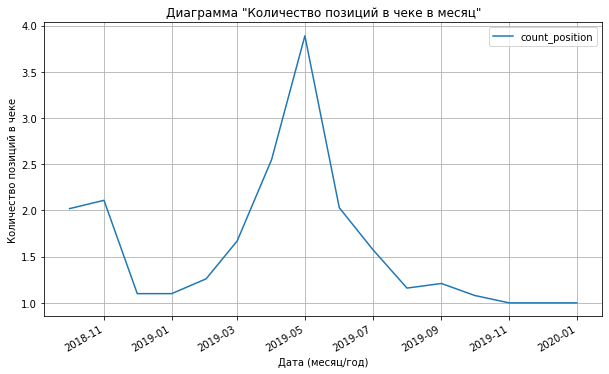

In [29]:
gr_count_year.plot(x='date_mY',
                    y='count_position',
                    figsize=(10,6),
                    grid=True,
                    x_compat=True)
plt.title('Диаграмма "Количество позиций в чеке в месяц"')
plt.xlabel('Дата (месяц/год)')
plt.ylabel('Количество позиций в чеке')
plt.show()

In [30]:
perc = [ .80, .90, .95, .99]
gr_count_year['count_position'].describe(percentiles=perc)

count    16.000000
mean      1.610000
std       0.778177
min       1.000000
50%       1.235000
80%       2.030000
90%       2.330000
95%       2.885000
99%       3.689000
max       3.890000
Name: count_position, dtype: float64

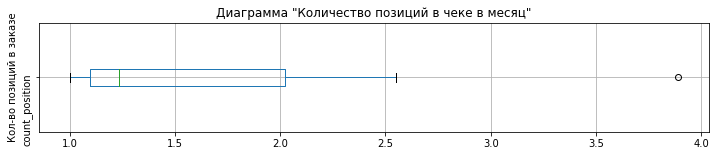

In [31]:
gr_count_year.boxplot(column=['count_position'], 
                       figsize = (12, 2), 
                       rot = 90,
                      vert = False)
plt.title('Диаграмма "Количество позиций в чеке в месяц"')
plt.ylabel('Кол-во позиций в заказе')
plt.show()

#### **Выводы по разделу**

Вот здесь, с разбивкой по месяцам четко видно, что:
- максимальное количество позиций в чеке было в мае 2019 года - 3,89 позиции
- после этого количество позиций стремится к минимуму и на протяжении трёх последних месяцев равняется 1,0

### Средний чек
Рассмотрим, как меняется средний чек в разрезе месяцев

In [32]:
#Посчитаем сумму покупки в каждом заказе помесячно
avr_check=data.groupby(['date_mY','order_id'])['sale'].sum().reset_index(name='sale')

avr_check_year=round(avr_check.groupby('date_mY')['sale'].mean().reset_index(name='avr_check'),2)
avr_check_year

,date_mY,avr_check
0,2018-10,1478.37
1,2018-11,1763.59
2,2018-12,1238.80
3,2019-01,1401.90
4,2019-02,1064.50
5,2019-03,1026.90
6,2019-04,1197.43
7,2019-05,1300.08
8,2019-06,5678.90
9,2019-07,1149.04


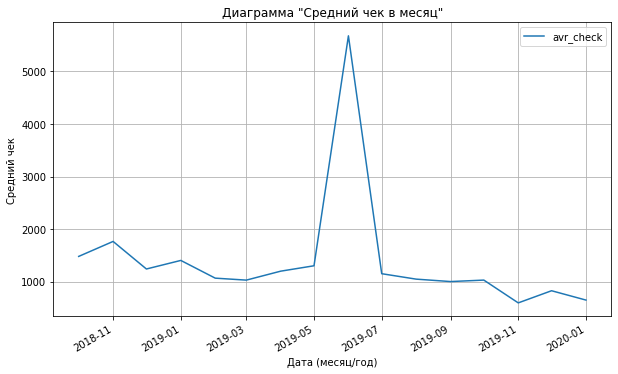

In [33]:
avr_check_year.plot(x='date_mY',
                    y='avr_check',
                    figsize=(10,6),
                    grid=True,
                    x_compat=True)
plt.title('Диаграмма "Средний чек в месяц"')
plt.xlabel('Дата (месяц/год)')
plt.ylabel('Средний чек')
plt.show()

In [34]:
perc = [ .80, .90, .95, .99]
avr_check_year['avr_check'].describe(percentiles=perc)

count      16.000000
mean     1402.330000
std      1177.914935
min       593.480000
50%      1106.770000
80%      1401.900000
90%      1620.980000
95%      2742.417500
99%      5091.603500
max      5678.900000
Name: avr_check, dtype: float64

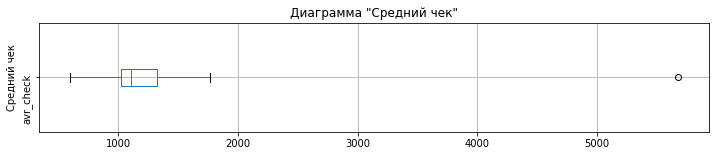

In [35]:
avr_check_year.boxplot(column=['avr_check'], 
                       figsize = (12, 2), 
                       rot = 90,
                      vert = False)
plt.title('Диаграмма "Средний чек"')
plt.ylabel('Средний чек')
plt.show()

In [36]:
avr_check_year['avr_check'].median()

1106.77

#### **Вывод по разделу**
- значение среднего чека меняется от 593,48 до 5 678,90
- медианное значение среднего чека равно 1 106,77
- максимальное значение средний чек достиг 06.2019
- после этого он упал в 5 раз - до 1149,04 и постоянно уменьшался, достигнув в 01.2020 году значения 593,48

### Динамика продаж
Проанализируем общую динамику продаж по месяцам


In [37]:
sales_year=avr_check.groupby('date_mY')['sale'].sum().reset_index(name='sales')
sales_year

,date_mY,sales
0,2018-10,350374
1,2018-11,359772
2,2018-12,341910
3,2019-01,234117
4,2019-02,304446
5,2019-03,249537
6,2019-04,316122
7,2019-05,228814
8,2019-06,908624
9,2019-07,226361


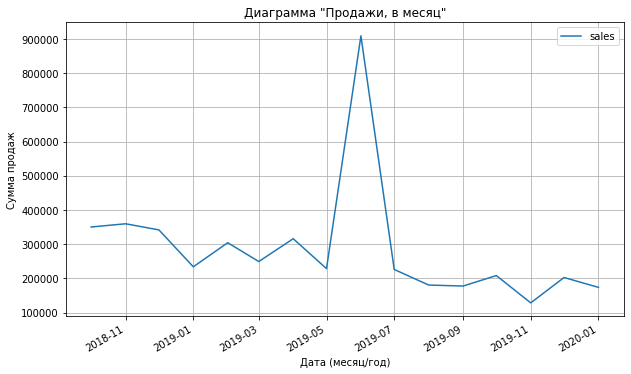

In [38]:
sales_year.plot(x='date_mY',
                    y='sales',
                    figsize=(10,6),
                    grid=True,
                    x_compat=True)
plt.title('Диаграмма "Продажи, в месяц"')
plt.xlabel('Дата (месяц/год)')
plt.ylabel('Сумма продаж')
plt.show()

In [39]:
perc = [ .80, .90, .95, .99]
sales_year['sales'].describe(percentiles=perc)

count        16.000000
mean     287072.187500
std      179877.106113
min      128785.000000
50%      231465.500000
80%      341910.000000
90%      355073.000000
95%      496985.000000
99%      826296.200000
max      908624.000000
Name: sales, dtype: float64

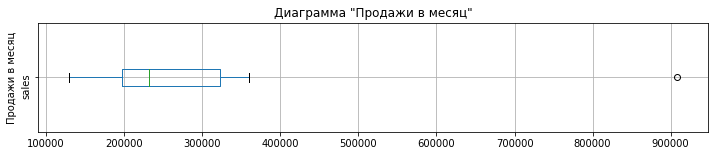

In [40]:
sales_year.boxplot(column=['sales'], 
           figsize = (12, 2), 
                       rot = 90,
                      vert = False)
plt.title('Диаграмма "Продажи в месяц"')
plt.ylabel('Продажи в месяц')
plt.show()

In [41]:
sales_year['sales'].median()

231465.5

#### **Вывод по разделу**
- картина по ежемесячным продажам один в один повторяет диаграмму и выводы по среднему чеку
- максимальные продажи в 06.2019 года - затем падение продаж более чем в 5 раз
- последние три месяца общая выручка на минимальном уровне


### Дополнительная обработка аномалий
Одна аномалия очень сильно выделяется. Это продажи за 06.2019 года

In [42]:
print('В июне 2019 года продажи составили', sales_year.loc[8,'sales'], 
      '- максимально возможные за весь период исследования - примерно в 5 раз больше, чем до и после.',
      '\nТо же самое можно сказать и про средний чек - он в 5 раз больше, чем до и после 06.2019 -',
      avr_check_year.loc[8,'avr_check'],
      '\nПри этом количество заказов в этом месяце - минимальное', cust_count_year.loc[8,'order_id'],
      '\n',
      '\nРассмотрим подробнее продажи за июнь 2019 года'
     )


В июне 2019 года продажи составили 908624 - максимально возможные за весь период исследования - примерно в 5 раз больше, чем до и после. 
То же самое можно сказать и про средний чек - он в 5 раз больше, чем до и после 06.2019 - 5678.9 
При этом количество заказов в этом месяце - минимальное 160 
 
Рассмотрим подробнее продажи за июнь 2019 года


In [43]:
data[data['date_mY']=='2019-06'].sort_values(by='sale', ascending=False)


,date,customer_id,order_id,product,quantity,price,category,category_name,sale,date_mY
229,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675,5,кухня,675000,2019-06
346,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148,7,спальня,49432,2019-06
3820,2019-06-04 07:00:00,940c175f-ea87-44e0-9e16-0a3d0a9abecd,71598,скатерть круглая d-175 см 50% полиэстер 50% хл...,10,1140,6,ванная,11400,2019-06
3791,2019-06-12 09:00:00,940c175f-ea87-44e0-9e16-0a3d0a9abecd,71685,скатерть 180 см wellness wtd180-лион*01 100% п...,8,1104,6,ванная,8832,2019-06
4266,2019-06-11 10:00:00,85716494-dd51-4d1d-ab28-8c74b87f14dc,71674,сушилка для белья leifheit pegasus 200 deluxe ...,1,7004,8,"уборка, инвентарь, хранение",7004,2019-06
...,...,...,...,...,...,...,...,...,...,...
3130,2019-06-01 23:00:00,a59f9951-59cd-4245-ae0e-4a99346b2b2a,14837,"рассада арбуза сорт сибирские огни, горшок 9*9см",1,38,1,"семена, овощи/фрукты",38,2019-06
1335,2019-06-10 11:00:00,f32b5708-af61-42e7-baba-9f3759d87841,71661,"крючок проволочный 120 мм оцинкованный, 1110212",1,15,8,"уборка, инвентарь, хранение",15,2019-06
1973,2019-06-05 10:00:00,d9619a55-3171-495f-954d-e184d8f52d43,14851,патиссон нло белый раннеспелый d-7 см,1,15,1,"семена, овощи/фрукты",15,2019-06
1972,2019-06-05 10:00:00,d9619a55-3171-495f-954d-e184d8f52d43,14851,патиссон зонтик раннеспелый d-7 см,1,15,1,"семена, овощи/фрукты",15,2019-06


**ОГО!** Заказ на 1000 вантузов с деревянной ручкой, красного цвета срезу дает прирост в продажах на 675 000 рублей - это больше любой суммы продаж, чем в каждом месяце.

Посмотрим, это был разовый момент, или несколько покупок

In [44]:
data[data['product']=='вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000'].sort_values(by='sale', ascending=False)

,date,customer_id,order_id,product,quantity,price,category,category_name,sale,date_mY
229,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675,5,кухня,675000,2019-06


Да, продажа таких вантузов была разовой акцией) Следовательно, можно считать, что:
- если такая продажа была, то явно аномалия
- если тех сбой при передачи данных - тоже аномалия
- это просто - аномалия!

Для дальнейшего анализа, уберем эту продажу из датафрейма

In [45]:
data_cor= data[data['product']!='вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000'].reset_index()
data_cor

,index,date,customer_id,order_id,product,quantity,price,category,category_name,sale,date_mY
0,0,2019-03-21 14:00:00,036d75ea-b633-41a8-8974-3f84fee8c65e,70822,tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399,5,кухня,2399,2019-03
1,1,2020-01-29 17:00:00,4228e34b-dcba-4df8-ae70-b282e84a1edb,110547,tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399,5,кухня,2399,2020-01
2,2,2019-08-16 02:00:00,2eef43dd-ad75-4e55-a46d-edea403bcb6b,72306,tepмокружка avex freeflow 700 мл сталь avex0776,1,2399,5,кухня,2399,2019-08
3,3,2018-10-15 09:00:00,092ef2d7-30d2-4d15-9c40-35af6973f28b,68650,tepмокружка avex recharge 500 мл голубой avex0681,1,2324,5,кухня,2324,2018-10
4,4,2019-02-13 22:00:00,aa4058c4-7f20-4df1-ab65-24d47011026b,70250,tepмокружка avex recharge 500 мл голубой avex0681,1,1874,5,кухня,1874,2019-02
...,...,...,...,...,...,...,...,...,...,...,...
5516,5583,2019-10-06 13:00:00,6da625e0-d187-456a-bf0a-44bbc4f6d26b,72869,ящик для хранения фимако люкс плетеный с крышк...,2,749,8,"уборка, инвентарь, хранение",1498,2019-10
5517,5584,2019-07-10 21:00:00,6caea624-7a90-4a0f-8704-2612e344a4b3,71937,ящик почтовый металлический с врезным замком п...,1,277,8,"уборка, инвентарь, хранение",277,2019-07
5518,5585,2018-11-24 09:00:00,e72fcd9e-d3d0-4a40-8910-6bce6e794aed,69104,ящик почтовый металлический с ушками для навес...,1,172,8,"уборка, инвентарь, хранение",172,2018-11
5519,5586,2019-12-24 00:00:00,72880258-72b9-4390-b394-e90dfb25536b,112111,ящик почтовый металлический с ушками для навес...,2,172,8,"уборка, инвентарь, хранение",344,2019-12


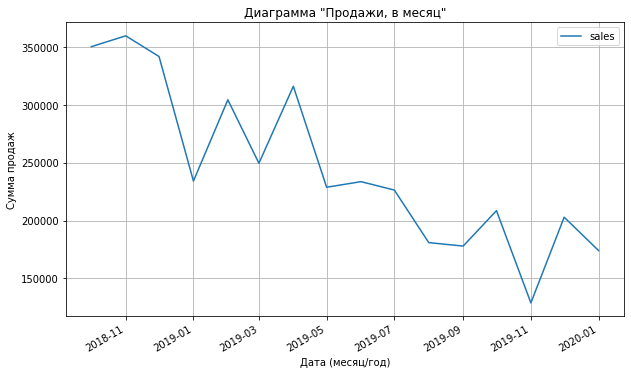

In [46]:
avr_check_cor=data_cor.groupby(['date_mY','order_id'])['sale'].sum().reset_index(name='avr_check')
sales_year_cor=avr_check_cor.groupby('date_mY')['avr_check'].sum().reset_index(name='sales')

sales_year_cor.plot(x='date_mY',
                    y='sales',
                    figsize=(10,6),
                    grid=True,
                    x_compat=True)
plt.title('Диаграмма "Продажи, в месяц"')
plt.xlabel('Дата (месяц/год)')
plt.ylabel('Сумма продаж')
plt.show()

In [47]:
sales_year_cor

,date_mY,sales
0,2018-10,350374
1,2018-11,359772
2,2018-12,341910
3,2019-01,234117
4,2019-02,304446
5,2019-03,249537
6,2019-04,316122
7,2019-05,228814
8,2019-06,233624
9,2019-07,226361


Вот так изменилась кардинально диаграмма "Продаж в месяц". четко прослеживается нисходящий тренд с небольшими всплесками.

Далее работаем с корректированной таблицей данных **data_cor**

In [48]:
sales_year_cor.describe()

,sales
count,16.000000
mean,244884.687500
std,69947.642408
min,128785.000000
25%,197384.500000
50%,231219.000000
75%,307365.000000
max,359772.000000


In [49]:
data_cor['customer_id'].nunique()

2412

### **Общий вывод по разделу "Предварительный анализ данных"**
1. Период для анализа предоставленный в датафрейме с 01.10.2018 по 31.01.2020
2. Выполнено 3492 заказа
3. Уникальных клиентов 2412
4. Медианная сумма заказа составляет 427.0 
5. Медианные продажи в месяц - 244 884,69
6. В заказе в среднем не более 1,0 позиции
7. Пик продаж пришёлся на 11.2018 года
8. На дату окончания анализа - минимальные показатели за всеь период анализа, кроме количества заказов
9. Рост количества заказов за последние три месяца с 217 до 269, при одновременно низком среднем чеке в 646,94, а так же всего 1 позиции, ведет к минимальным продажам за период
10. Для дальнейшего анализа удалили аномальную продаж

В целом картина продаж выглядет печально. Поранализируем сруктуру продаж

## Анализ продаж по категориям товара

### Количество позиций внутри категорий

In [50]:
category_count=data_cor.groupby(['category_name'])['category_name'].count().sort_values(ascending=False).reset_index(name='count_category')
category_count

,category_name,count_category
0,"семена, декоративные растения",1967
1,"уборка, инвентарь, хранение",1348
2,"семена, овощи/фрукты",785
3,кухня,497
4,искусственные растения,310
5,ванная,303
6,спальня,252
7,химия,41
8,"семена, деревья",18


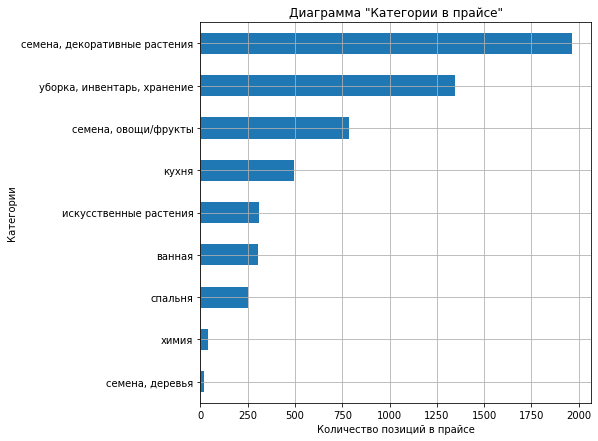

In [51]:
category_count.sort_values(by='count_category',ascending=True).plot(x='category_name',
                                                                    y='count_category',
                                                                    figsize=(7,7),
                                                                    kind='barh',
                                                                    legend=False,
                                                                    grid=True)
plt.title('Диаграмма "Категории в прайсе"')
plt.xlabel('Количество позиций в прайсе')
plt.ylabel('Категории')
plt.show()

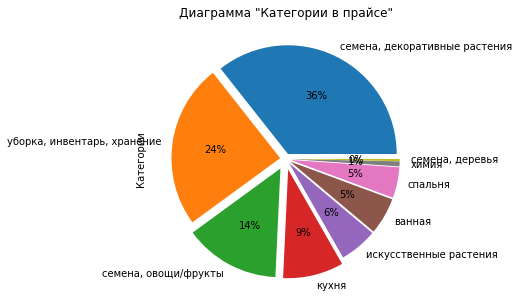

In [52]:
category_count.plot(y='count_category',
                    figsize=(5,5),
                    kind='pie',
                    autopct='%1.0f%%',
                    labels=category_count['category_name'],
                    explode = (0.05, 0.05, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05),
                    legend=False)
plt.title('Диаграмма "Категории в прайсе"')
plt.ylabel('Категории')
plt.show()

#### **Вывод по разделу**
1. Разделил для анализа прайс на 9 категорий, исходя из функциональных и тематических особенностей
2. ТОР-3 представленности в прайсе:
    - занимает 74% от общего числа товара
        - семена, декоративные растения - 36%
        - уборка, инвентарь, хранение - 24%
        - семена, овощи/фрукты - 14%
3. На оставшиеся 6 категорий приходится 26% позиций

### Категории, сумма
Расммотрим, как распределены категории по полученной сумме

In [53]:
category_sales=data_cor.groupby(['category_name'])['sale'].sum().sort_values(ascending=False).reset_index(name='sales_category')
category_sales

,category_name,sales_category
0,"уборка, инвентарь, хранение",1910691
1,спальня,501546
2,"семена, декоративные растения",468285
3,ванная,423114
4,кухня,384641
5,искусственные растения,112468
6,"семена, овощи/фрукты",84594
7,"семена, деревья",17939
8,химия,14877


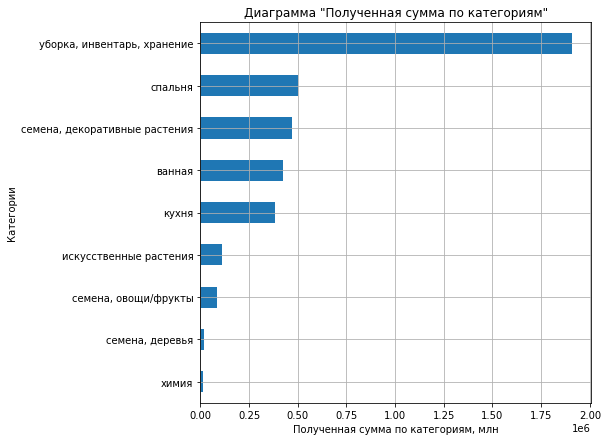

In [54]:
category_sales.sort_values(by='sales_category',ascending=True).plot(x='category_name',
                                                                    y='sales_category',
                                                                    figsize=(7,7),
                                                                    kind='barh',
                                                                    legend=False,
                                                                    grid=True
                                                                 )
plt.title('Диаграмма "Полученная сумма по категориям"')
plt.xlabel('Полученная сумма по категориям, млн')
plt.ylabel('Категории')
plt.show()

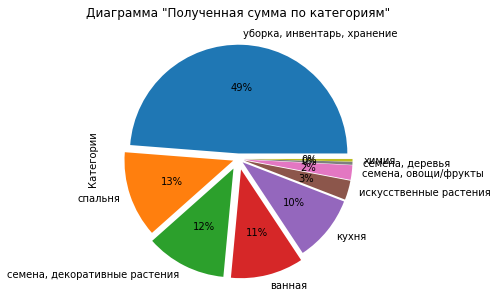

In [55]:
category_sales.plot(y='sales_category',
                    figsize=(5,5),
                    kind='pie',
                    autopct='%1.0f%%',
                    labels=category_sales['category_name'],
                    explode = (0.05, 0.05, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05),
                    legend=False)
plt.title('Диаграмма "Полученная сумма по категориям"')
plt.ylabel('Категории')
plt.show()

#### **Вывод по разделу**
В ТОР-3 по полученным суммам входят 3 позиции:
   - суммарно 74%
        - уборка, инвентарь, хранение - 49%
        - спальня - 13%
        - семена, декоративные растения - 12%
   - на оставшиеся позиции - 26% от продаж

### Категории, количество проданных товаров
Проанализируем, суммарное количество, проданных в каждой категории

In [56]:
quant_count=data_cor.groupby(['category_name'])['quantity'].sum().sort_values(ascending=False).reset_index(name='quantity_category')
quant_count

,category_name,quantity_category
0,"уборка, инвентарь, хранение",3534
1,"семена, декоративные растения",2883
2,искусственные растения,2284
3,кухня,1546
4,"семена, овощи/фрукты",1156
5,спальня,1142
6,ванная,597
7,химия,82
8,"семена, деревья",20


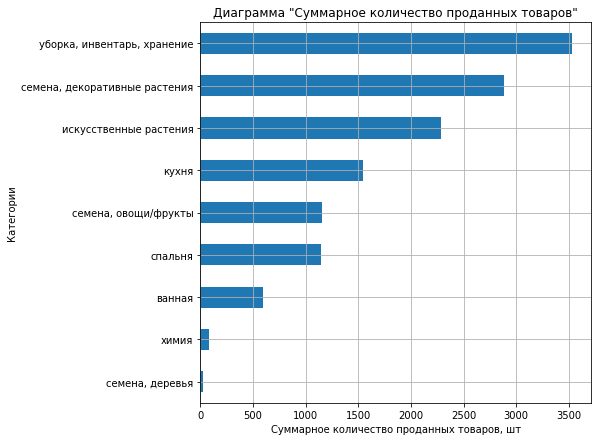

In [57]:
quant_count.sort_values(by='quantity_category',ascending=True).plot(x='category_name',
                                                                    y='quantity_category',
                                                                    figsize=(7,7),
                                                                    kind='barh',
                                                                    legend=False,
                                                                    grid=True
                                                                 )
plt.title('Диаграмма "Суммарное количество проданных товаров"')
plt.xlabel('Суммарное количество проданных товаров, шт')
plt.ylabel('Категории')
plt.show()

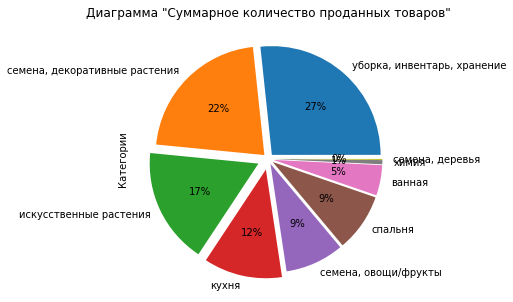

In [58]:
quant_count.plot(y='quantity_category',
                    figsize=(5,5),
                    kind='pie',
                    autopct='%1.0f%%',
                    labels=quant_count['category_name'],
                    explode = (0.05, 0.05, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05),
                    legend=False)
plt.title('Диаграмма "Суммарное количество проданных товаров"')
plt.ylabel('Категории')
plt.show()

#### **Вывод по разделу**
В ТОР-3 по суммарному количеству проданных товаров входят: 
- суммарно 66% 
    - уборка, инвентарь, хранение - 27%
    - семена, декоративные растения - 22%
    - искусственные растения - 17%
- на оставшиеся категории - 34%

### Отношение суммы к категории
Проанализируем, среднюю стоимость 1 позиции

In [59]:
category_sum=data_cor.groupby('category_name').agg({'price':'sum', 'quantity':'sum'}).reset_index()
category_sum['average_сheck']=round(category_sum['price']/category_sum['quantity'], 2)
category_sum.sort_values(by='average_сheck', ascending=False)

,category_name,price,quantity,average_сheck
4,"семена, деревья",16426,20,821.30
0,ванная,295540,597,495.04
7,"уборка, инвентарь, хранение",1624880,3534,459.78
6,спальня,353011,1142,309.12
2,кухня,212723,1546,137.60
3,"семена, декоративные растения",337431,2883,117.04
8,химия,8259,82,100.72
5,"семена, овощи/фрукты",66472,1156,57.50
1,искусственные растения,20110,2284,8.80


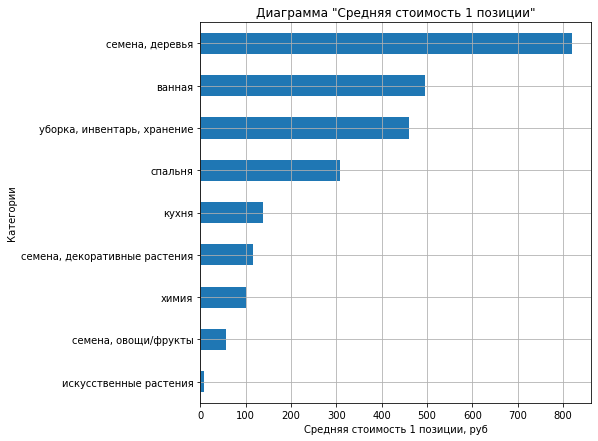

In [60]:
category_sum.sort_values(by='average_сheck',ascending=True).plot(x='category_name',
                                                                    y='average_сheck',
                                                                    figsize=(7,7),
                                                                    kind='barh',
                                                                    legend=False,
                                                                    grid=True
                                                                 )
plt.title('Диаграмма "Средняя стоимость 1 позиции"')
plt.xlabel('Средняя стоимость 1 позиции, руб')
plt.ylabel('Категории')
plt.show()

#### **Вывод по разделу**
TOP-3 по стоимости 1 позиции:
- семена, деревья
- ванная
- убока, инвентарь, хранение


### Динамика продаж по категориям
Проанализируем, как осуществлялись продажи по категориям товаров в разрезе годовых циклов (зима, весна, лето, осень).

Добавим в таблицу столбец с признаками "времена года"

In [61]:
def season(month):
    if  3 <= month <= 5:
        return '01 весна'
    elif 6 <= month <= 8:
        return '02 лето'
    elif 9 <= month <= 11:
        return '03 осень'
    else:
        return '04 зима'
    
data_cor['month']=data_cor['date_mY'].dt.month
data_cor['season'] = data_cor['date_mY'].dt.month.apply(season)
data_cor.head()

,index,date,customer_id,order_id,product,quantity,price,category,category_name,sale,date_mY,month,season
0,0,2019-03-21 14:00:00,036d75ea-b633-41a8-8974-3f84fee8c65e,70822,tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399,5,кухня,2399,2019-03,3,01 весна
1,1,2020-01-29 17:00:00,4228e34b-dcba-4df8-ae70-b282e84a1edb,110547,tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399,5,кухня,2399,2020-01,1,04 зима
2,2,2019-08-16 02:00:00,2eef43dd-ad75-4e55-a46d-edea403bcb6b,72306,tepмокружка avex freeflow 700 мл сталь avex0776,1,2399,5,кухня,2399,2019-08,8,02 лето
3,3,2018-10-15 09:00:00,092ef2d7-30d2-4d15-9c40-35af6973f28b,68650,tepмокружка avex recharge 500 мл голубой avex0681,1,2324,5,кухня,2324,2018-10,10,03 осень
4,4,2019-02-13 22:00:00,aa4058c4-7f20-4df1-ab65-24d47011026b,70250,tepмокружка avex recharge 500 мл голубой avex0681,1,1874,5,кухня,1874,2019-02,2,04 зима


#### Объем продаж, сезон
Построим график продаж товаров по объему продаж по годовым циклам

In [62]:
category_count_season=data_cor.groupby(['season', 
                                       'category_name']).agg({'order_id':'count'}).reset_index()
category_count_season.head()

,season,category_name,order_id
0,01 весна,ванная,49
1,01 весна,искусственные растения,62
2,01 весна,кухня,54
3,01 весна,"семена, декоративные растения",820
4,01 весна,"семена, овощи/фрукты",541


В исследуемом датафайле осень и зима представлены по 5 месяцев (в 2 разных годах), а весна и лето - по 3 месяца (данные только за 2019 год). Поэтому добавим в таблицу корректировку, данные за осень и зиму умножим на 0,6

In [63]:
for k in range(len(category_count_season)):
    if category_count_season.loc[k,'season']=='03 осень':
        category_count_season.loc[k,'order_id']=0.6*category_count_season.loc[k,'order_id']
    elif category_count_season.loc[k,'season']=='04 зима':
        category_count_season.loc[k,'order_id']=0.6*category_count_season.loc[k,'order_id']

category_count_season.head()

,season,category_name,order_id
0,01 весна,ванная,49.0
1,01 весна,искусственные растения,62.0
2,01 весна,кухня,54.0
3,01 весна,"семена, декоративные растения",820.0
4,01 весна,"семена, овощи/фрукты",541.0


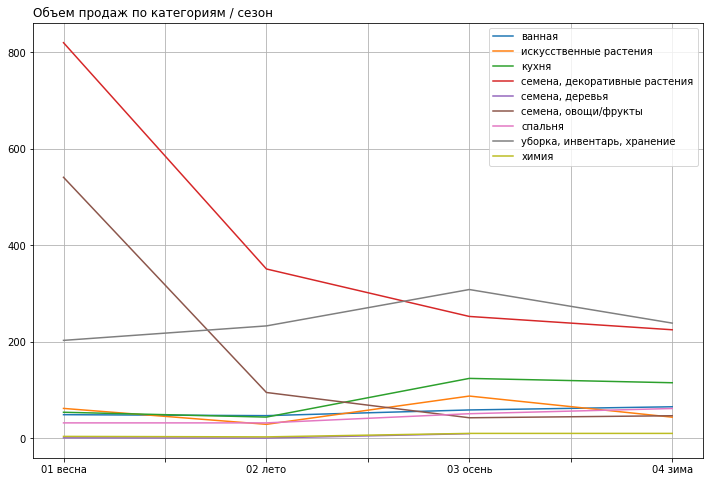

In [64]:
fig, ax = plt.subplots(figsize = (12, 8), sharey = True)
category_count_season.groupby('category_name').plot('season', 'order_id', grid = True, ax = ax)
plt.legend(('ванная', 'искусственные растения', 'кухня',
           'семена, декоративные растения', 'семена, деревья','семена, овощи/фрукты', 'спальня',
           'уборка, инвентарь, хранение', 'химия'))
plt.title('Объем продаж по категориям / сезон', loc = 'left')
plt.xlabel('')

plt.show()

#### **Вывод по разделу**
1. **Весна**
    - лидерами по количеству проданных позиций являются группы "семена, декоративные растения" и "семена, овощи/фрукты"
    - минимальные продажи по количеству - "химия", "спальня", "ванная 
2. **Лето**
    - лидерами по количеству проданных позиций являются группы "семена, декоративные растения" и "уборка, инвентарь, хранение"
    - минимальные продажи по количеству - "семена, деревья", "химия", "искусственные растения"
3. **Осень**
    - лидерами по количеству проданных позиций являются группы "уборка, инвентарь, хранение" и "семена, декоративные растения"
    - так же можно отметиьт увеличение продаж по количеству товаров "искусственные растения"
    - минимальные продажи по количеству - "семена, деревья", "химия", "семена, овощи/фрукты"
4. **Зима**
    - лидерами по количеству проданных позиций являются группы "уборка, инвентарь, хранение" и "семена, декоративные растения"
    - минимальные продажи по количеству - "семена, деревья", "химия", "искусственные растения"

Т.о. можно говорить о сезонности для следующих товаров по объему продаж:
- семена, овощи/фрукты - пик приходится на весну, затем падение более чем в 6,5 раз до самого следующего сезона
- семена, декоративные растения - пик приходится на весну, но падение не такое сильное, как на семена овощи/фрукты - не более чем в 2-3 раза
- уборка, инвентарь, хранение - рост продаж с весны и до осени, к зиме незначительное - падение
- кухня - рост лето, осень, зима
- искусственные растения - к осени

Незначительный рост, либо отсуствие сезонности
- спальня
- ванная 
- семена, деревья
- химия

#### Сумма продаж, сезон
Построим график продаж товаров по сумме продаж по годовым циклам, с учетом корректировки по осени и зиме

In [65]:
category_sales_season=data_cor.groupby(['season', 
                                       'category_name']).agg({'sale':'sum'}).reset_index()
for k in range(len(category_sales_season)):
    if category_sales_season.loc[k,'season']=='03 осень':
        category_sales_season.loc[k,'sale']=0.6*category_sales_season.loc[k,'sale']
    elif category_sales_season.loc[k,'season']=='04 зима':
        category_sales_season.loc[k,'sale']=0.6*category_sales_season.loc[k,'sale']
category_sales_season.head()

,season,category_name,sale
0,01 весна,ванная,50676.0
1,01 весна,искусственные растения,32518.0
2,01 весна,кухня,54243.0
3,01 весна,"семена, декоративные растения",191917.0
4,01 весна,"семена, овощи/фрукты",60203.0


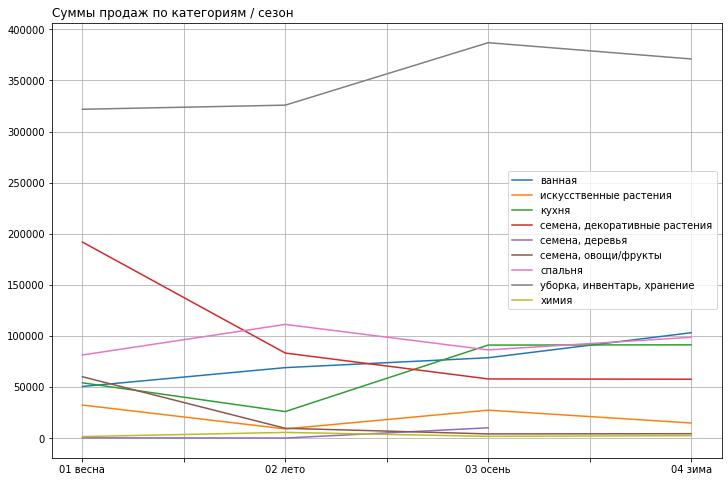

In [66]:
fig, ax = plt.subplots(figsize = (12, 8), sharey = True)
category_sales_season.groupby('category_name').plot('season', 'sale', grid = True, ax = ax)
plt.legend(('ванная', 'искусственные растения', 'кухня',
           'семена, декоративные растения', 'семена, деревья','семена, овощи/фрукты', 'спальня',
           'уборка, инвентарь, хранение', 'химия'))
plt.title('Суммы продаж по категориям / сезон', loc = 'left')
plt.xlabel('')

plt.show()

#### **Вывод по разделу**
1. **Весна**
    - лидерами по сумме продаж являются группы "уборка, инвентарь, хранение", "семена, декоративные растения" и "спальня"
    - минимальные продажи по сумме продаж - "химия", "искусственные растения", "ванная 
2. **Лето**
    - лидерами по сумме продаж являются группы "уборка, инвентарь, хранение", "спальня" и "семена, декоративные растения"
    - минимальные продажи по сумме продаж - "семена, деревья", "химия", "искусственные растения"
3. **Осень**
    - лидерами по сумме продаж являются группы "уборка, инвентарь, хранение" и "кухня", "спальня"
    - минимальные продажи по сумме продаж - "семена, деревья", "химия", "семена, овощи/фрукты"
4. **Зима**
    - лидерами по количеству проданных позиций являются группы "уборка, инвентарь, хранение" и "ванная", "спальня"
    - минимальные продажи по сумме продаж - "химия", "семена, деревья", "семена, овощи/фрукты"

Т.о. можно говорить о сезонности для следующих товаров по сумме продаж:
- семена, овощи/фрукты - пик приходится на весну, затем падение до  следующего сезона
- семена, декоративные растения - пик приходится на весну, но падение не такое сильное, как на семена овощи/фрукты - не более чем в 2-3 раза
- уборка, инвентарь, хранение - рост продаж с весны и до осени, к зиме незначительное - падение
- кухня - рост лето, осень
- ванная - на протяжении всего года
- искусственные растения - рост весна и осень, падение лето и зима

Незначительный рост, либо отсуствие сезонности
- спальня
- семена, деревья
- химия

### ТОП ПРОДАЖ
Рассмотрим, какие товары составляют ТОП-10 продаж

#### ТОП-10 продаж по сумме 

In [67]:
data_cor.groupby(['product', 'category_name'])['price'].sum().sort_values(ascending=False).reset_index().head(10)

,product,category_name,price
0,сумка-тележка 2-х колесная gimi argo синяя,"уборка, инвентарь, хранение",50405
1,сумка-тележка хозяйственная andersen scala sho...,"уборка, инвентарь, хранение",28045
2,сушилка meliconi stendy junior,"уборка, инвентарь, хранение",27970
3,сумка-тележка хозяйственная rolser pack gloria...,"уборка, инвентарь, хранение",19674
4,сумка-тележка 2-х колесная gimi galaxy черная,"уборка, инвентарь, хранение",19567
5,сумка-тележка 3-х колесная gimi tris floral синяя,"уборка, инвентарь, хранение",18893
6,сумка-тележка хозяйственная andersen treppenst...,"уборка, инвентарь, хранение",18560
7,сумка-тележка хозяйственная andersen scala sho...,"уборка, инвентарь, хранение",18296
8,сумка-тележка 2-х колесная складная gimi flexi...,"уборка, инвентарь, хранение",18139
9,гладильная доска sarayli new elegant 125x45 см,спальня,17843


ТОР-10 продаж по сумме в разрезе категорий товаров

In [68]:
for t in data_cor['category_name'].unique():
    print('TOP-10 продаж по сумме в категории', t)
    data_cor_t=data_cor[data_cor['category_name']==t]
    print(data_cor_t.groupby(['product', 
                              'category_name'])['price'].sum().sort_values(ascending=False).reset_index().head(10))
    print('\n')

TOP-10 продаж по сумме в категории кухня
                                             product category_name  price
0  мусорный контейнер hailo bigbin swing 45 0845-...         кухня  16536
1  коврик кухонный apache olive oil sideboard 56х...         кухня   5788
2  tepмокружка avex freeflow 700 мл зеленый avex0759         кухня   4798
3  tepмокружка avex recharge 500 мл голубой avex0681         кухня   4198
4  весы электронные кухонные soehnle (круглые,20 ...         кухня   3822
5  кастрюля чугунная 24 см, красная, 3.6 л, pyrex...         кухня   3598
6       отделитель косточек от вишен leifheit, 37200         кухня   3298
7  кастрюля круглая 20 см серая 2,2 л, чугунная с...         кухня   3298
8  хлебница деревянная (бук) кб-028, 35х28х19 см ...         кухня   3072
9  котел алюминиевый 70,0 л без крышки балезино, ...         кухня   2924


TOP-10 продаж по сумме в категории уборка, инвентарь, хранение
                                             product  \
0         сумка-тележка 

#### **Вывод по разделу**
- ТОП-10 по суммам продаж на 90% состоит из товаров из раздела **уборка, инвентарь, хранение**
- в топе продаж сумки-тележки
- максимальная сумма получена за товар "сумка-тележка 2-х колесная gimi argo синяя" - 50 405

#### ТОП-10 продаж по объему

In [69]:
data_cor.groupby(['product', 'category_name'])['quantity'].sum().sort_values(ascending=False).reset_index().head(10)

,product,category_name,quantity
0,муляж яблоко 9 см красное,искусственные растения,618
1,вешалки мягкие для деликатных вещей 3 шт шоколад,спальня,335
2,"ручка-скоба рс-100 белая *трибатрон*, 1108035","уборка, инвентарь, хранение",201
3,"крепеж для пружины дверной, 1107055","уборка, инвентарь, хранение",170
4,плечики пластмассовые размер 52 - 54 тула 1205158,спальня,160
5,пружина дверная 240 мм оцинкованная (д-19 мм) ...,"уборка, инвентарь, хранение",150
6,муляж яблоко зеленый 9 см полиуретан,искусственные растения,148
7,муляж банан желтый 21 см полиуретан,искусственные растения,109
8,щетка-сметка 4-х рядная деревянная 300 мм (фиг...,"уборка, инвентарь, хранение",105
9,"ёрш унитазный с деревянной ручкой , ваир 1712012",ванная,103


ТОР-10 продаж по объему в разрезе категорий товаров

In [70]:
for t in data_cor['category_name'].unique():
    print('TOP-10 продаж по объему в категории', t)
    data_cor_t=data_cor[data_cor['category_name']==t]
    print(data_cor_t.groupby(['product', 
                              'category_name'])['quantity'].sum().sort_values(ascending=False).reset_index().head(10))
    print('\n')

TOP-10 продаж по объему в категории кухня
                                             product category_name  quantity
0  универсальный нож webber из нержавеющей стали ...         кухня        81
1  салфетка protec textil polyline 30х43 см амети...         кухня        80
2  ковш пластмассовый полимербыт с215, 1,5 л 1406006         кухня        69
3      набор ножей attribute chef 5 предметов akf522         кухня        64
4     кружка с трубочкой attribute мяч 500 мл jar501         кухня        61
5  тарелка суповая luminarc океан эклипс 20,5 см ...         кухня        60
6  кружка нордик 380мл прозрачная h8502 luminarc ...         кухня        30
7  тарелка обеденная luminarc океан эклипс 24 см ...         кухня        30
8  нож кухонный универсальный с пластмассовой руч...         кухня        24
9  завертка форточная белая/антик с полимерным по...         кухня        22


TOP-10 продаж по объему в категории уборка, инвентарь, хранение
                                             

#### **Вывод по разделу**
- в ТОП-10 по количеству проданных товаров 
    - 40% - товары из категории **"уборка, инвентарь, хранение"**
    - 30% - товары из категории **"искусственные растения"**
    - 20% - товары из категории **"спальня"**
    - 10% - товары из категории **"ванная"**
- максимально по количеству продан товар "муляж яблоко 9 см красное", категория "искусственные растения" - 618 шт.

### **Общий вывод по разделу "Анализ продаж по категориям товара"**
1. Полученный датафрейм изначально не содержал в себе разделения товаров по категориям, что существенно затрудняло проведение анализа продаж. Поэтому в ходе предобработки данных была произведена сегментация на 9 категорий:
    - семена, декоративные растения	
    - уборка, инвентарь, хранение	
    - семена, овощи/фрукты	
    - кухня	
    - искусственные растения
    - ванная
    - спальня
    - химия
    - семена, деревья
    
*!Поскольку в представленном файле отсутствует информация о складской стоимости товара, или о маржинальной надбавке к складской стоимости, то далее везде, где указаны суммы продаж - говорится не о полученной прибыли, а именно полученных от продаж суммах*

2. ТОР-3 представленности в прайсе по количеству товарных позиций:
    - семена, декоративные растения - 36%
    - уборка, инвентарь, хранение - 24%
    - семена, овощи/фрукты - 14%
    - TOP-3 занимает 74% от общего числа товарных позиций, на оставшиеся 6 категорий приходится 21% позиций

3. ТОР-3 по полученным суммам:
    - суммарно 74%
    - уборка, инвентарь, хранение - 49%
    - спальня - 13%
    - семена, декоративные растения - 12%
    - TOP-3 занимает 74% от полученных сумм, на оставшиеся 6 категорий приходится 26% полученной суммы
4.  ТОР-3 по суммарному количеству проданных товаров (объем продаж) входят:
- уборка, инвентарь, хранение - 27%
- семена, декоративные растения - 22%
- искусственные растения - 17%
- TOP-3 занимает 66% от суммарного количества проданных товвров, на оставшиеся 6 категорий приходится 35% полученной суммы

5. TOP-3 по стоимости 1 позиции (средний чек):
    - семена, деревья - 821,30
    - ванная - 495.04
    - уборка, инвентарь, хранение - 459.78
    
*! Самый большой средний чек в категории "семена, деревья". В то же время, как показал дальнейший анализ, в этой категории минмальные продажи за год. Целесообразно проанализировать маржинальность товаров этой категории, затраты на хранение и прочие расходы, для того, чтобы поставить вопрос о дальнейшей необходимости продаж.*

6. При исследовании сезонности продаж было учтено, что сезоны "осень", "зима" представленны в файле 5 месяцами (2018-2019 гг для "осени", 2019-2020 гг для "зимы"). Поэтому для адекватной оценки к количественным показателям товаров в эти периоды был применен понижающий коэффициент 0,6.

*! "осень-ззима" - 5 месяцев, "весна-лето" - 3 месяца.* 

7. Сезонность продаж товаров по объему продаж
    - семена, овощи/фрукты - пик приходится на весну, затем падение более чем в 6,5 раз до самого следующего сезона
    - семена, декоративные растения - пик приходится на весну, но падение не такое сильное, как на семена овощи/фрукты - не более чем в 2-3 раза
    - уборка, инвентарь, хранение - рост продаж с весны и до осени, к зиме незначительное - падение
    - кухня - рост лето, осень, зима
    - искусственные растения - к осени
    - незначительный рост, либо отсуствие сезонности
        - спальня
        - ванная
        - семена, деревья
        - химия

8. Сезонность продаж товаров по сумме продаж
    - семена, овощи/фрукты - пик приходится на весну, затем падение до  следующего сезона
    - семена, декоративные растения - пик приходится на весну, но падение не такое сильное, как на семена овощи/фрукты - не более чем в 2-3 раза
    - уборка, инвентарь, хранение - рост продаж с весны и до осени, к зиме незначительное - падение
    - кухня - рост лето, осень
    - ванная - на протяжении всего года
    - искусственные растения - рост весна и осень, падение лето и зима
    - незначительный рост, либо отсуствие сезонности
        - спальня
        - семена, деревья
        - химия

9. ТОР-10 продаж по сумме продаж в разрезе категорий товаров
    - ТОП-10 по суммам продаж на 90% состоит из товаров из раздела **уборка, инвентарь, хранение**
    - в топе продаж сумки-тележки
    - максимальная сумма получена за товар "сумка-тележка 2-х колесная gimi argo синяя" - 50 405
10. ТОР-10 продаж по объему в разрезе категорий товаров
    - в ТОП-10 по количеству проданных товаров 
        - 40% - товары из категории **"уборка, инвентарь, хранение"**
        - 30% - товары из категории **"искусственные растения"**
        - 20% - товары из категории **"спальня"**
        - 10% - товары из категории **"ванная"**
    - максимально по количеству продан товар "муляж яблоко 9 см красное", категория "искусственные растения" - 618 шт.

## RFM-анализ

**RFM-анализ — метод анализа, позволяющий сегментировать клиентов по частоте и сумме покупок и выявлять тех, которые приносят больше денег.**

Аббревиатура RFM расшифровывается:
- **Recency — давность** (как давно ваши клиенты совершали покупку). Высокий показатель давности означает, что у клиента уже сложилось достаточно хорошее впечатление о вашем бренде, поэтому он недавно посещал вас. Давность в срезе клиентской базы можно посмотреть, если отсортировать клиентов по дате последней покупки.
- **Frequency — частота** (как часто они у вас покупают). Высокий показатель частоты говорит о том, что клиенту нравится ваш бренд, ваши товары и услуги, поэтому он часто к вам возвращается.
- **Monetary — деньги** (общая сумма трат). Высокий уровень этого показателя означает, что клиенту нравится тратить именно у вас

Сегментируем базу по покупательской активности. Делим её на группы, чтобы узнать, как часто клиенты покупают и сколько тратят. Анализируем по трём параметрам:

- время с момента последней покупки — «recency»;
- количество покупок — «frequency»;
- сумма покупок — «monetary».

**Датой отсчета возьмем 01.02.2020**

In [71]:
data_recen=data_cor.loc[:,['date', 'customer_id', 'order_id', 'sale', 'product']].reset_index()
day_t=datetime(2020,2,1,0,0,0)

data_recen['date_recen']=day_t-data_recen['date']
data_recen['date_recen']=data_recen['date_recen'].astype(str).str.partition(' ')[0].astype(int)
data_recen['date_recen'].describe()

count    5521.000000
mean      271.026444
std       132.056903
min         0.000000
25%       186.000000
50%       277.000000
75%       367.000000
max       488.000000
Name: date_recen, dtype: float64

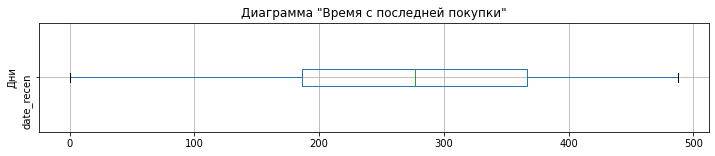

In [72]:
data_recen.boxplot(column=['date_recen'], 
           figsize = (12, 2), 
                       rot = 90,
                      vert = False)
plt.title('Диаграмма "Время с последней покупки"')
plt.ylabel('Дни')
plt.show()

In [73]:
data_recen['date_recen'].median()

277.0

In [74]:
data_recen.head()

,index,date,customer_id,order_id,sale,product,date_recen
0,0,2019-03-21 14:00:00,036d75ea-b633-41a8-8974-3f84fee8c65e,70822,2399,tepмокружка avex freeflow 700 мл зеленый avex0759,316
1,1,2020-01-29 17:00:00,4228e34b-dcba-4df8-ae70-b282e84a1edb,110547,2399,tepмокружка avex freeflow 700 мл зеленый avex0759,2
2,2,2019-08-16 02:00:00,2eef43dd-ad75-4e55-a46d-edea403bcb6b,72306,2399,tepмокружка avex freeflow 700 мл сталь avex0776,168
3,3,2018-10-15 09:00:00,092ef2d7-30d2-4d15-9c40-35af6973f28b,68650,2324,tepмокружка avex recharge 500 мл голубой avex0681,473
4,4,2019-02-13 22:00:00,aa4058c4-7f20-4df1-ab65-24d47011026b,70250,1874,tepмокружка avex recharge 500 мл голубой avex0681,352


Соберем RFM-таблицу

In [75]:
temp=['customer_id', 'order_id', 'date', 'sale', 'product']
rfm_table=data_recen[temp]
# собираем rfm_table
NOW = dt.datetime(2020,2,1)
rfm_table=rfm_table.groupby('customer_id').agg({'date': lambda x: (NOW - x.max()).days, # Recency
                                                'order_id': lambda x: len(x.unique()), # Frequency
                                                'sale': lambda x: x.sum(),          # Monetary
                                                'product': lambda x: x.count()})    # глубина чека 

rfm_table['date'] = rfm_table['date'].astype(int)

rfm_table.rename(columns={'date': 'recency', 
                         'order_id': 'frequency',
                         'sale': 'monetary',
                         'product':'check_depth'}, inplace=True)

# средний чек для исследования
rfm_table['avr_check']=round(rfm_table['monetary']/rfm_table['frequency'], 2)

rfm_table.head()

,recency,frequency,monetary,check_depth,avr_check
customer_id,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555,4,555.0
001cee7f-0b29-4716-b202-0042213ab038,349,1,442,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914,1,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324,1,2324.0


In [76]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2412 entries, 000d6849-084e-4d9f-ac03-37174eaf60c4 to ffe82299-3f5b-4214-87fe-3d36ecccfac3
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   recency      2412 non-null   int64  
 1   frequency    2412 non-null   int64  
 2   monetary     2412 non-null   int64  
 3   check_depth  2412 non-null   int64  
 4   avr_check    2412 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 113.1+ KB


RFM-анализ местами перекликается с известным Законом Парето, гласящим, что 80% результатов происходят благодаря 20% усилий. Когда на этот закон смотрят через призму маркетинга, это означает, что 80% всех ваших продаж исходят от 20% наиболее лояльных и постоянных клиентов. Постоянники всегда буду иметь высокое значение на выручку в бизнесе, а следовательно – возвращаемость этих клиентов крайне важна для показателей.

### Критерии сегментации клиентов.

Распределим клиентов на сегменты с учётом времени с момента последнего приобретения (Recency), частоты покупок (Frequency) и суммы потраченных средств (Monetary). Каждому из клиентов поставим по три оценки, соответствующие каждому из этих параметров. Например, по трёхбалльной системе (где 3 — хорошо, 2 — нормально и 1 — плохо).

Диапазон для каждого показателя будет свой.

#### Показатели Recency и Frequency
Построим диаграмму рассеяния, чтобы увидеть как взаимосвязанны эти две величины

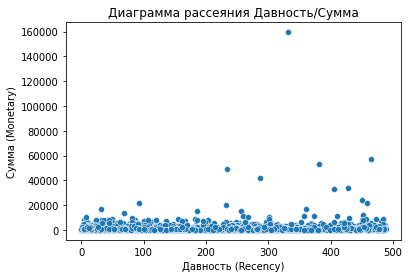

In [77]:
sns.scatterplot(data=rfm_table, 
                x="recency", 
                y="monetary")
plt.title('Диаграмма рассеяния Давность/Сумма')
plt.xlabel('Давность (Recency)')
plt.ylabel('Сумма (Monetary)')
plt.show()

Видим, что показатель Давность (Recency) равномерно распределен вдоль всей оси Х, следовательно для его категоризации можем воспользоваться функцией pd.qcut. Она позволит равномерно распределить выполненные заказы внутри показателя.

По показателю Сумма (Monetary) оценить распределение мешают продажи выбросы. Проанализируем, как они распределены с помощью "ящика с усами" и функции describe

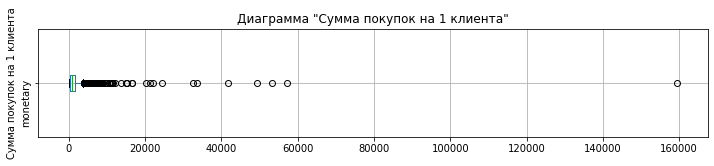

In [78]:
rfm_table.boxplot(column=['monetary'], 
           figsize = (12, 2), 
                       rot = 90,
                      vert = False)
plt.title('Диаграмма "Сумма покупок на 1 клиента"')
plt.ylabel('Сумма покупок на 1 клиента')
plt.show()

In [79]:
rfm_table['monetary'].describe([0.8, 0.95])

count      2412.000000
mean       1624.442371
std        4341.389468
min          15.000000
50%         834.000000
80%        2110.600000
95%        4885.700000
max      159508.000000
Name: monetary, dtype: float64

Исходя из принципа Парето, 80% покупок не превышает по стоимости 2109,40. Так же видим, что выбросы становятся редкими после 10 000.

Построим диаграмму рассеяния при условии, что monetary<10000.

Так же добавим для визуализации на график две линии, равные 80% и 95% сумм покупок

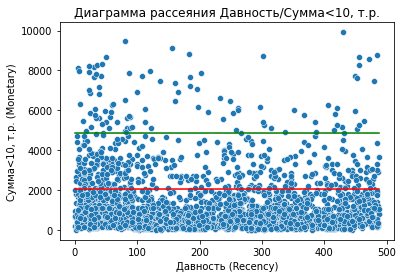

In [80]:
sns.scatterplot(data=rfm_table[rfm_table['monetary']<10000], 
                x="recency", 
                y="monetary")
sns.lineplot( data=rfm_table[rfm_table['monetary']<10000], x="recency", y=2083, color='Red')
sns.lineplot( data=rfm_table[rfm_table['monetary']<10000], x="recency", y=4856, color='Green')
plt.title('Диаграмма рассеяния Давность/Сумма<10, т.р.')
plt.xlabel('Давность (Recency)')
plt.ylabel('Сумма<10, т.р. (Monetary)')
plt.show()

Наглядно видно, что основное количество покупок находится ниже красной линии (80%). Так же - выше зеленой линии (95%) покупок становится меньше.

Примем распределение показателя monetary следующим образом:
1. Покупки от 0 до 2083 = '1'
2. Покупки от 2083 до 4856 = '2'
3. Остальные покупки = '3'

Провести ранжирование по частоте заказов frequency с использованием функции rqut так же невозможно, т.к. содержится очень много значений равных '1'

Посмотрим, как распределена частота заказов

In [81]:
freq=rfm_table['frequency'].value_counts().reset_index()
freq['perc']=round(freq['frequency']/freq['frequency'].sum()*100,2)
freq

,index,frequency,perc
0,1,1539,63.81
1,2,845,35.03
2,3,20,0.83
3,4,3,0.12
4,126,1,0.04
5,5,1,0.04
6,7,1,0.04
7,17,1,0.04
8,35,1,0.04


Поэтому распределение по категориям сделаем следующим образом:
1. 1 заказ = '1'
2. 2 заказа = '2'
3. остальные = '3'

Принцип Парето, лежащий в основе метода категоризации, будет выполнен.

Если просто разбить на равные части (напрмер, квантили), то часть клиентов с количеством заказов, равными 1 окажутся во 2 и 3 категории, что будет не совсем верно, при проведении анализа

#### Сегментация клиентов

In [82]:
rfm_table=rfm_table.reset_index()

# делим на категории значения rfm_table

#r_quartile
rfm_table['r_quartile']=pd.qcut(rfm_table['recency'],
        labels=['3', '2', '1'],
        q=3).astype(str)

#f_quartile
for k in range(len(rfm_table['frequency'])):
    if rfm_table.loc[k,'frequency']==1:
        rfm_table.loc[k,'f_quartile']='1'
    elif rfm_table.loc[k,'frequency']==2:
        rfm_table.loc[k,'f_quartile']='2'
    else:
        rfm_table.loc[k,'f_quartile']='3'   

#m_quartile        
for m in range(len(rfm_table['monetary'])):
    if 0 < rfm_table.loc[m,'monetary'] <2083:
        rfm_table.loc[m,'m_quartile']='1'
    elif 2110<=  rfm_table.loc[m,'monetary'] <4856:
        rfm_table.loc[m,'m_quartile']='2'
    else:
        rfm_table.loc[m,'m_quartile']='3' 


rfm_table['rfm_class'] = rfm_table['r_quartile'] + rfm_table['f_quartile'] + rfm_table['m_quartile']


rfm_table

,customer_id,recency,frequency,monetary,check_depth,avr_check,r_quartile,f_quartile,m_quartile,rfm_class
0,000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555,4,555.0,2,1,1,211
1,001cee7f-0b29-4716-b202-0042213ab038,349,1,442,1,442.0,1,1,1,111
2,00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914,1,914.0,2,1,1,211
3,002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649,1,1649.0,1,1,1,111
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324,1,2324.0,2,1,2,212
...,...,...,...,...,...,...,...,...,...,...
2407,ff601403-b094-4b86-9ac6-264d725b9277,12,2,1739,2,869.5,3,2,1,321
2408,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,92,1,397,1,397.0,3,1,1,311
2409,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,412,1,389,1,389.0,1,1,1,111
2410,ffb80538-3fda-4351-8ea9-9d2bec58bb07,144,1,974,1,974.0,2,1,1,211


In [83]:
rfm_class_count=rfm_table['rfm_class'].value_counts().sort_values(ascending=False).reset_index()
rfm_class_count['perc']=round(rfm_class_count['rfm_class']/rfm_class_count['rfm_class'].sum(),4)*100

Распределение клиентов получается следующим образом

<table>
  
<tr align="left">
    <th>оценки</th>
    <th>оценки</th>
    <th>оценки</th>   
</tr>
<tr>
    <td>111<br/>
    давние, разовые, низкий чек</td>
    <td>211<br/>
    спящие, разовые, низкий чек</td>
    <td>311<br/>
    недавние, разовые, низкий чек</td>
</tr>
<tr>
    <td>112<br/>
    давние, разовые, средний чек</td>
    <td>212<br/>
    спящие, разовые, средний чек</td>
    <td>312<br/>
    недавние, разовые, средний чек</td>
</tr>
<tr>
    <td>113<br/>
    давние, разовые, высокий чек</td>
    <td>213<br/>
    спящие, разовые, высокий чек</td>
    <td>313<br/>
    недавние, разовые, высокий чек</td>
</tr>

<tr>
    <td>121<br/>
    давние, редкие, низкий чек</td>
    <td>221<br/>
    спящие, редкие, низкий чек</td>
    <td>321<br/>
    недавние, редкие, низкий чек</td>
</tr>
<tr>
    <td>122<br/>
    давние, редкие, средний чек</td>
    <td>222<br/>
    спящие, редкие, средний чек</td>
    <td>322<br/>
    недавние, редкие, средний чек</td>
</tr>
<tr>
    <td>123<br/>
    давние, редкие, высокий чек</td>
    <td>223<br/>
    спящие, редкие, высокий чек</td>
    <td>323<br/>
    недавние, редкие, высокий чек</td>
</tr>    

<tr>
    <td>131<br/>
    давние, частые, низкий чек</td>
    <td>231<br/>
    спящие, частые, низкий чек</td>
    <td>331<br/>
    недавние, частые, низкий чек</td>
</tr>
<tr>
    <td>132<br/>
    давние, частые, средний чек</td>
    <td>232<br/>
    спящие, частые, средний чек</td>
    <td>332<br/>
    недавние, частые, средний чек</td>
</tr>
<tr>
    <td>133<br/>
    давние, частые, высокий чек</td>
    <td>233<br/>
    спящие, частые, высокий чек</td>
    <td>333<br/>
    недавние, частые, высокий чек</td>
</tr>    


</table>

In [84]:
rfm_class_count

,index,rfm_class,perc
0,111,617,25.58
1,211,604,25.04
2,321,532,22.06
3,322,140,5.80
4,112,93,3.86
5,212,83,3.44
6,311,71,2.94
7,323,51,2.11
8,221,45,1.87
9,121,38,1.58


Топ-5 таблицы перекрвают 82,86% клиентской базы.

С другой стороны - получилось 24 сегмента, в половине которых содержатся менее 10 клиентов. Целесообразно объединить некоторые категории, обладающих сходными характеристиками. В частности, можно вопользоваться одной из таблиц RFM-маркетинга, и объединить клиентов следующим образом:

<table>
  
<tr align="left">
    <th>Сегмент</th>
    <th>Поведение</th> 
    <th>RFM сегменты</th> 
</tr>
<tr>
    <td>Чемпионы</td>
    <td > Недавно покупали, покупают часто и больше всех</td>
    <td > 333</td>
</tr>
<tr>
    <td>Лояльные</td>
    <td>Делают частые покупки на крупные суммы</td>
    <td > 322, 323</td>
</tr>
<tr>
    <td>Требуют внимание</td>
    <td>Уровень давности выше среднего, частота и сумма покупок на на среднем уровне.<br/>Могут не совершать покупки в последнее время</td>
    <td >  222, 213</td>
</tr>
<tr>
    <td>Растущие</td>
    <td>Недавно покупали, но не крупные суммы</td>
    <td > 211, 212, 321</td>
</tr>
 <tr>   
    <td>На грани</td>
    <td>Показатели давности, частоты и суммы покупок ниже средней</td>
    <td > 221, 232</td>
</tr>
<tr>
    <td>В зоне риска</td>
    <td>Ранее часто тратили большие суммы, но давно не были у вас</td>
    <td > 113, 132, 223, 231, 233</td>
</tr>
<tr>
    <td>Новички</td>
    <td>В последнее время совершали покупки, необязательно крупные.<br/>Низкий уровень частоты и суммы покупок, т.к. они только недавно заметили ваш интернет-магазин</td>
    <td >311, 312, 313</td>
</tr>
<tr>
    <td>Спящие</td>
    <td>Последняя покупка была очень давно, так же низкие чек и кол-во покупок</td>
    <td >111, 112, 122, 123, 131, 133</td>
</tr>
</table>

In [85]:
category_dictionary = {
    'Чемпионы':['333'],
    'Лояльные':['322', '323'],
    'Требуют внимание':['221', '222', '213'],
    'Растущие':['211', '212','321'],
    'На грани':['221','232'],
    'В зоне риска':['113', '132', '223', '231', '233'],
    'Новички':['311','312', '313'],
    'Спящие':['111', '112', '122', '123', '131', '133']
    }  

def categorize_product(product):
  
    for category, items_of_list in category_dictionary.items():
        for item in items_of_list:
            if item in product:
                return category
    return category

rfm_table['category'] = rfm_table['rfm_class'].apply(categorize_product)
display(rfm_table.shape)
rfm_table.head(10)

(2412, 11)

,customer_id,recency,frequency,monetary,check_depth,avr_check,r_quartile,f_quartile,m_quartile,rfm_class,category
0,000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555,4,555.0,2,1,1,211,Растущие
1,001cee7f-0b29-4716-b202-0042213ab038,349,1,442,1,442.0,1,1,1,111,Спящие
2,00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914,1,914.0,2,1,1,211,Растущие
3,002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649,1,1649.0,1,1,1,111,Спящие
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324,1,2324.0,2,1,2,212,Растущие
5,004d24e9-4a6c-4d0e-8727-8391dfd4b43a,369,1,1536,1,1536.0,1,1,1,111,Спящие
6,005ba170-45e8-42de-93f7-192481ae2659,87,2,7857,2,3928.5,3,2,3,323,Лояльные
7,00bd74b1-2792-47db-a2f1-680a09ac5026,467,1,937,1,937.0,1,1,1,111,Спящие
8,00c0f92a-121a-4883-a78d-2c7b5fe187de,50,2,321,2,160.5,3,2,1,321,Растущие
9,00c95d20-923e-4b45-88fc-53b12931d462,43,1,186,1,186.0,3,1,1,311,Новички


In [86]:
rfm_class_count_category=rfm_table['category'].value_counts().sort_values(ascending=False).reset_index()
rfm_class_count_category['perc']=round(rfm_class_count_category['category']/rfm_class_count_category['category'].sum(),4)*100
rfm_class_count_category

,index,category,perc
0,Растущие,1219,50.54
1,Спящие,768,31.84
2,Лояльные,191,7.92
3,Требуют внимание,88,3.65
4,Новички,81,3.36
5,В зоне риска,57,2.36
6,На грани,7,0.29
7,Чемпионы,1,0.04


Т.к. в "Чемпионах" оказался всего 1 клиент, для чистоты проводимого анализа добавим его в сегмент "Лояльные". 

Тоже самое проделаем с сегментом "На грани" - 7 клиентов, с показателями давности, частоты и суммы покупок ниже средней - отнесем их к сегменту "Требуют внимание"

In [87]:
rfm_table[rfm_table['category']=='Чемпионы']

,customer_id,recency,frequency,monetary,check_depth,avr_check,r_quartile,f_quartile,m_quartile,rfm_class,category
1079,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,92,17,21361,17,1256.53,3,3,3,333,Чемпионы


In [88]:
rfm_table.loc[1079,'category']='Лояльные'
rfm_table[rfm_table['category']=='На грани']


,customer_id,recency,frequency,monetary,check_depth,avr_check,r_quartile,f_quartile,m_quartile,rfm_class,category
985,6a86cc77-ef15-496f-b5d3-89005597ee5d,154,3,3151,16,1050.33,2,3,2,232,На грани
1718,b7b865ab-0735-407f-8d0c-31f74d2806cc,283,7,3779,18,539.86,2,3,2,232,На грани
1789,bea7a833-2074-42db-bc49-4457abd3c930,228,4,4409,14,1102.25,2,3,2,232,На грани
1947,d02429ab-22e0-4ff2-9465-3082befde444,159,3,3261,3,1087.00,2,3,2,232,На грани
2103,dfbcfde5-21de-4504-aff4-453e617d81c1,260,3,2804,20,934.67,2,3,2,232,На грани
2170,e8204583-4d55-4724-ad3f-049c7db43bdd,147,3,3102,3,1034.00,2,3,2,232,На грани
2196,eb6521ae-56e3-4a72-9ea2-e9c69701ff3f,297,3,2903,21,967.67,2,3,2,232,На грани


In [89]:
rfm_table.loc[985,'category']='Требуют внимание'
rfm_table.loc[1718,'category']='Требуют внимание'
rfm_table.loc[1789,'category']='Требуют внимание'
rfm_table.loc[1947,'category']='Требуют внимание'
rfm_table.loc[2103,'category']='Требуют внимание'
rfm_table.loc[2170,'category']='Требуют внимание'
rfm_table.loc[2196,'category']='Требуют внимание'

In [90]:
#обновляем таблицу с сегментами
rfm_class_count_category=rfm_table['category'].value_counts().sort_values(ascending=False).reset_index()
rfm_class_count_category['perc']=round(rfm_class_count_category['category']/rfm_class_count_category['category'].sum()*100,2)
rfm_class_count_category

,index,category,perc
0,Растущие,1219,50.54
1,Спящие,768,31.84
2,Лояльные,192,7.96
3,Требуют внимание,95,3.94
4,Новички,81,3.36
5,В зоне риска,57,2.36


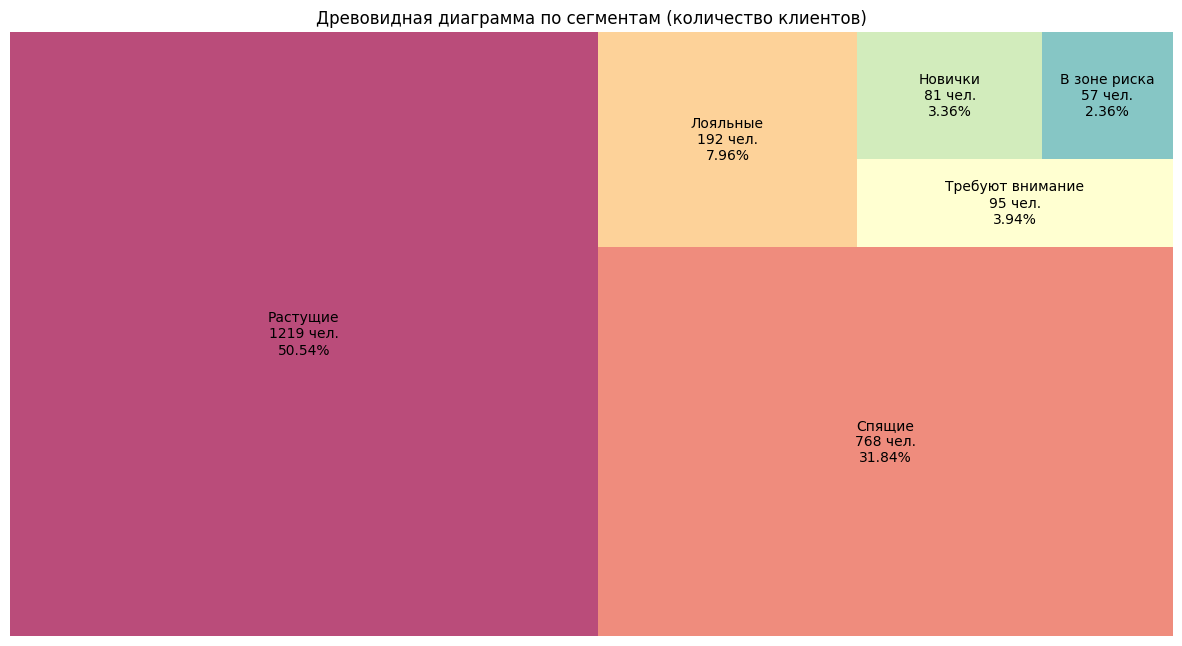

In [91]:
# Древовидная диаграмма

df =rfm_class_count_category
labels = df.apply(lambda x: str(x[0]) + "\n" + str(x[1]) +" чел.\n" +str(x[2]) + "%", axis=1)
sizes = df['category'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(15,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.7)

plt.title('Древовидная диаграмма по сегментам (количество клиентов)')
plt.axis('off')
plt.show()

In [92]:
category_rfm=rfm_table['category'].unique()
rfm_table.groupby('category').agg({'category':'count',
                                   'recency':'mean',    #давность
                                  'frequency': 'mean',  #частота
                                  'monetary': 'mean',   #сумма
                                  'check_depth':'mean', #глубина
                                  'avr_check':'mean'}).rename(columns={'category':'cat_count'}).sort_values(by='cat_count',
                                                                                                           ascending=False)

,cat_count,recency,frequency,monetary,check_depth,avr_check
category,,,,,,
Растущие,1219,134.175554,1.436423,938.761280,2.234619,744.496308
Спящие,768,391.028646,1.286458,1430.625000,2.201823,1050.191784
Лояльные,192,45.052083,2.078125,4169.328125,2.078125,2035.580885
Требуют внимание,95,207.378947,1.852632,3570.305263,4.157895,2933.992421
Новички,81,84.888889,1.000000,898.074074,1.012346,898.074074
В зоне риска,57,347.807018,1.684211,8116.684211,4.035088,6563.617719


### **Вывод по разделу**
1. Сегментировали клиентов по трем критериям:
    - recency - давность покупки;
    - frequency - частота покупки;
    - monetary - сумма покупки (общая).
2. Объединили схожие сегменты клиентов и распределили по 7 категориям, обладающие схожими свойствами
    - "Растущие":
            - 1 219 клиентов, 50.54% от клиентской базы
            - давность покупок - 134.18 дня;
            - частота покупки - 1.44 раз;
            - сумма покупки - 938.76;
            - глубина покупки (количество позиций в чеке) - 2.23
            - средний чек покупки - 744.50;
     - "Спящие":
            - 768 клиент, 31.84% от клиентской базы
            - давность покупок - 391.0 дня;
            - частота покупки - 1.29 раз;
            - сумма покупки - 1 430.63;
            - глубина покупки (количество позиций в чеке) - 2.20
            - средний чек покупки - 1 050.19;
     - "Лояльные":
            - 192 клиента, 7.96% от клиентской базы
            - давность покупок - 45.05 дня;
            - частота покупки - 2.08 раз;
            - сумма покупки - 4 169.33;
            - глубина покупки (количество позиций в чеке) - 2.08
            - средний чек покупки - 2035.58;
     - "Требуют внимание":
            - 95 клиентов, 3.65% от клиентской базы
            - давность покупок - 207.38 дня;
            - частота покупки - 1.85 раза;
            - сумма покупки - 3 570.31;
            - глубина покупки (количество позиций в чеке) - 4.16
            - средний чек покупки -  2 934,00;
     - "Новички":
            - 81 клиент, 3.94% от клиентской базы
            - давность покупок - 84.89 дня;
            - частота покупки - 1.00 раз;
            - сумма покупки - 898.07;
            - глубина покупки (количество позиций в чеке) - 1.01
            - средний чек покупки - 898.07;
     - "В зоне риска":
            - 57 клиента, 2.36% от клиентской базы
            - давность покупок - 347.80 дня;
            - частота покупки - 1.68 раз;
            - сумма покупки - 8 116.68;
            - глубина покупки (количество позиций в чеке) - 4.04
            - средний чек покупки - 6563.62;
3. ТОП-3:
    - по количеству клиентов в сегменте:"Растущие", "Спящие", "Лояльные";
    - по давности покупки (минимальное количество дней с даты покупки): "Лояльные", "Новички", "Растущие";
    - по частоте покупок: "Лояльные", "Требуют внимание",  "В зоне риска";
    - по общей сумме покупки: "В зоне риска", "Лояльные", "Требуют внимание";
    - по глубине покупки: "Требуют внимание", "В зоне риска", "Растущие";
    - по величине среднего чека: "В зоне риска", "Требуют внимание", "Лояльные"

### Проверка гипотез
В ходе анализа выдвинем и проверим следующие гипотезы

1. Гипотеза №1 "Средний чек"
    - Н0 ="Величина среднего чека в сегментах возможно НЕ РАЗЛИЧАЕТСЯ"
    - Н1 ="Величина среднего чека в сегментах возможно различается"
2. Гипотеза №2 "Объем продаж"
    - Н0 ="Объем продаж в сегментах НЕ РАЗЛИЧАЕТСЯ"
    - Н1 ="Объем продаж в сегментах различается"

In [93]:
#вычисление ttest
def pval_cat_(cat1, cat2, one, two, i):
    
    alpha = 0.05/21

    results = st.ttest_ind(one, two)

    print('p-значение:', results.pvalue)
    pvalue.loc[cat1, cat2] = results.pvalue
    pvalue.loc[cat2, cat1] = results.pvalue
    if (results.pvalue < alpha):
        print("Исследуемая величина в сегментах '{}' и '{}' возможно различается (верна гипотеза Н1)".format(cat1, cat2))
    else:
        print("Исследуемая величина в сегментах '{}' и '{}' НЕ РАЗЛИЧАЕТСЯ (верна гипотеза Н0)".format(cat1, cat2))


In [94]:
#вычисление, тест Уилкоксона-Манна-Уитни
def mw_test(cat1, cat2, one, two, i):
    alpha = 0.05/15
    results = st.mannwhitneyu(one, two)
    print('p-значение: ', results.pvalue)
    pvalue.loc[cat1, cat2] = results.pvalue
    pvalue.loc[cat2, cat1] = results.pvalue
    if (results.pvalue < alpha):
        print("Исследуемая величина в сегментах '{}' и '{}' возможно различается (верна гипотеза Н1)".format(cat1, cat2))
    else:
        print("Исследуемая величина в сегментах '{}' и '{}' НЕ РАЗЛИЧАЕТСЯ (верна гипотеза Н0)".format(cat1, cat2))

In [95]:
#функция проверки критерия Шапиро-Уилка
def shapiro (md, cat_name):
    alpha = 0.05  # критический уровень статистической значимости
    metric_data = rfm_table[rfm_table['category']==md][cat_name]
    results = st.shapiro(metric_data)
    p_value = results[
        1
    ]  # второе значение в массиве результатов (с индексом 1) - p-value
    print('Проверка распределения сегмента', md)
    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Распределение не нормально')
    else:
        print('Нормальное распределение') 
    
        
    # График с распределением
    fig, ax = plt.subplots()
    ax.hist(metric_data, bins=30, density=True, alpha=0.5, label=('Сегмент '+md))  # Изменил bins на 30 для более детального графика

    mu, std = norm.fit(metric_data)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2, label='Нормальное распределение')
    ax.legend()
    plt.show()
    
    print('___________________________________')   

Проверим гипотезы

1. Гипотеза №1 "Средняя стоимость"
    - Н0 ="Величина среднего чека в сегментах возможно НЕ РАЗЛИЧАЕТСЯ"
    - Н1 ="Величина среднего чека в сегментах возможно различается"
-----
2. Гипотеза №2 "Глубина чека"
    - Н0 ="Глубина чека в сегментах возможно НЕ РАЗЛИЧАЕТСЯ"
    - Н1 ="Глубина чека в сегментах возможно различается"    

Проверим гипотезу о том, что выборка взята из нормально распределённой генеральной совокупности. Для этого применим критерий Шапиро-Уилка.

Проверка распределения сегмента Растущие
p-значение:  2.9341788544497345e-41
Распределение не нормально


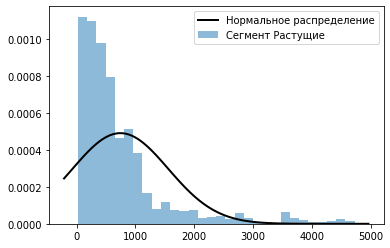

___________________________________
Проверка распределения сегмента Спящие
p-значение:  7.237986827930545e-41
Распределение не нормально


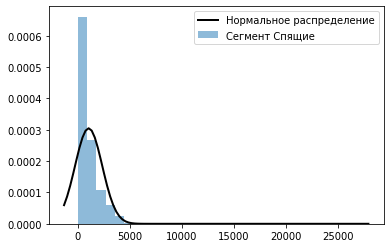

___________________________________
Проверка распределения сегмента Лояльные
p-значение:  1.0637654909297447e-15
Распределение не нормально


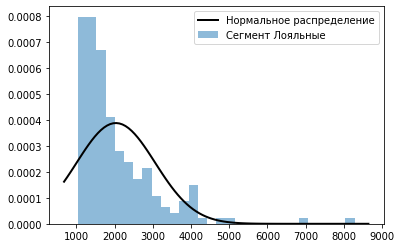

___________________________________
Проверка распределения сегмента Новички
p-значение:  7.152734134152627e-12
Распределение не нормально


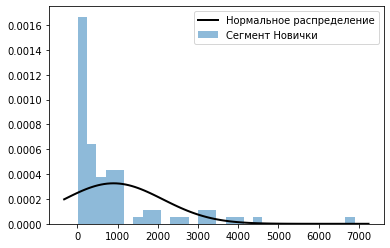

___________________________________
Проверка распределения сегмента В зоне риска
p-значение:  5.931844793138907e-09
Распределение не нормально


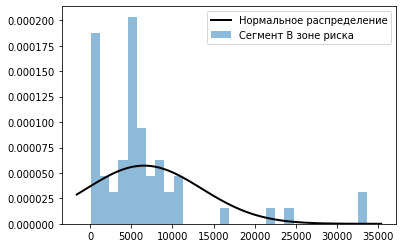

___________________________________
Проверка распределения сегмента Требуют внимание
p-значение:  3.5120834803192925e-17
Распределение не нормально


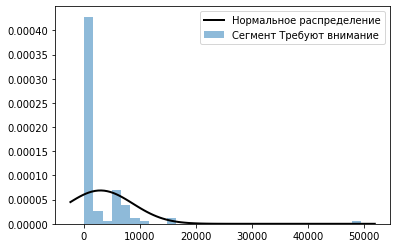

___________________________________


In [96]:
category_rfm=rfm_table['category'].unique()
k='avr_check' #с каким столбцом работаем
for i in category_rfm:
    shapiro(i,k)

Так как проверка критерия Шапиро-Уилка показала, что распределение не является нормальным, то для проверки гипотезы проведем непараметрический тест Уилкоксона-Манна-Уитни

Т.к. проводим несколько сравнений на одних и тех же данных — это множественный тест. Его важная особенность в том, что с каждой новой проверкой гипотезы растёт вероятность ошибки первого рода.

Поэтому, чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, применяют разные методы корректировки уровня значимости для уменьшения FWER («групповой коэффициент ошибок»). Мы будем использовать метод Бонферрони (поправка Бонферрони). Всего будет проведено до 21 тест, поэтому криntрий alpha будет поделен на число гипотез

In [97]:
print('Проверка первой гипотезы "Средний чек"\n')

pvalue = pd.DataFrame()
i = 0
for cat1 in category_rfm:
    for cat2 in category_rfm:
        if cat1 == cat2:
            break
        print (i + 1, end = '. ')
        mw_test(cat2, cat1, rfm_table.query('category == @cat1')[k],
                   rfm_table.query('category == @cat2')[k], i)
        i += 1
        print ()

Проверка первой гипотезы "Средний чек"

1. p-значение:  1.983722667783244e-14
Исследуемая величина в сегментах 'Растущие' и 'Спящие' возможно различается (верна гипотеза Н1)

2. p-значение:  1.4688040508276046e-73
Исследуемая величина в сегментах 'Растущие' и 'Лояльные' возможно различается (верна гипотеза Н1)

3. p-значение:  1.1009848879911919e-42
Исследуемая величина в сегментах 'Спящие' и 'Лояльные' возможно различается (верна гипотеза Н1)

4. p-значение:  0.3166890019204486
Исследуемая величина в сегментах 'Растущие' и 'Новички' НЕ РАЗЛИЧАЕТСЯ (верна гипотеза Н0)

5. p-значение:  0.0011618592729565173
Исследуемая величина в сегментах 'Спящие' и 'Новички' возможно различается (верна гипотеза Н1)

6. p-значение:  3.7976020654213455e-20
Исследуемая величина в сегментах 'Лояльные' и 'Новички' возможно различается (верна гипотеза Н1)

7. p-значение:  2.6426460819284563e-21
Исследуемая величина в сегментах 'Растущие' и 'В зоне риска' возможно различается (верна гипотеза Н1)

8. p-значен

Проверим вторую гипотезу на нормальность распределения с помощью критерия Шапиро-Уилка.

Проверка распределения сегмента Растущие
p-значение:  0.0
Распределение не нормально


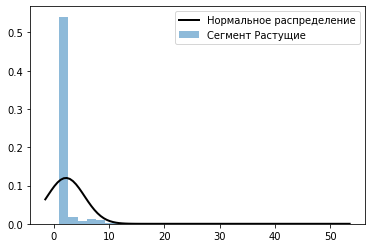

___________________________________
Проверка распределения сегмента Спящие
p-значение:  0.0
Распределение не нормально


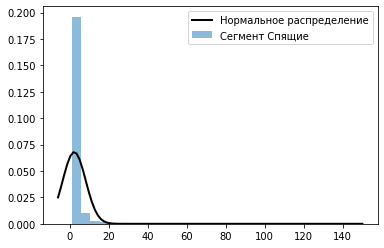

___________________________________
Проверка распределения сегмента Лояльные
p-значение:  6.267971729770986e-30
Распределение не нормально


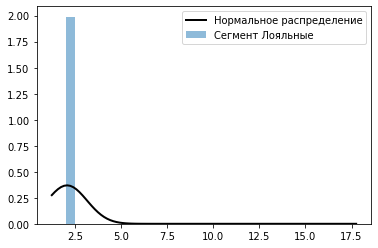

___________________________________
Проверка распределения сегмента Новички
p-значение:  4.838748089493789e-20
Распределение не нормально


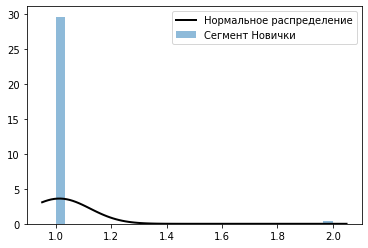

___________________________________
Проверка распределения сегмента В зоне риска
p-значение:  1.5963941323374198e-12
Распределение не нормально


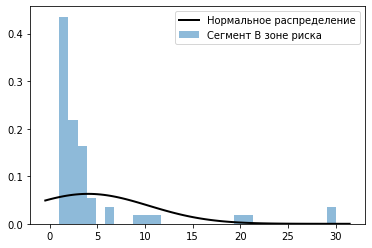

___________________________________
Проверка распределения сегмента Требуют внимание
p-значение:  1.1752100393164666e-15
Распределение не нормально


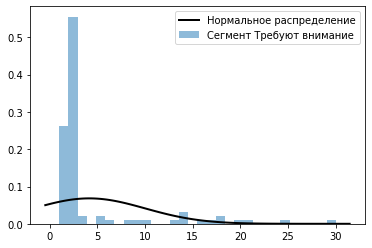

___________________________________


In [98]:
k='check_depth' #с каким столбцом работаем
for i in category_rfm:
    shapiro(i,k)

Распределения так же не являются нормальными, применяем тот же тест Уилкоксона-Манна-Уитни

In [99]:
print ('Проверка второй гипотезы "Глубина чека"\n')

pvalue = pd.DataFrame()
i = 0
for cat1 in category_rfm:
    for cat2 in category_rfm:
        if cat1 == cat2:
            break
        print (i + 1, end = '. ')
        mw_test(cat2, cat1, rfm_table.query('category == @cat1')[k],
                   rfm_table.query('category == @cat2')[k], i)
        i += 1
        print ()

Проверка второй гипотезы "Глубина чека"

1. p-значение:  3.84688758234937e-21
Исследуемая величина в сегментах 'Растущие' и 'Спящие' возможно различается (верна гипотеза Н1)

2. p-значение:  4.377108960555023e-18
Исследуемая величина в сегментах 'Растущие' и 'Лояльные' возможно различается (верна гипотеза Н1)

3. p-значение:  3.3515114974680684e-43
Исследуемая величина в сегментах 'Спящие' и 'Лояльные' возможно различается (верна гипотеза Н1)

4. p-значение:  4.751199830404129e-20
Исследуемая величина в сегментах 'Растущие' и 'Новички' возможно различается (верна гипотеза Н1)

5. p-значение:  2.4764886025841876e-07
Исследуемая величина в сегментах 'Спящие' и 'Новички' возможно различается (верна гипотеза Н1)

6. p-значение:  1.4517034637568236e-59
Исследуемая величина в сегментах 'Лояльные' и 'Новички' возможно различается (верна гипотеза Н1)

7. p-значение:  0.022316161928245495
Исследуемая величина в сегментах 'Растущие' и 'В зоне риска' НЕ РАЗЛИЧАЕТСЯ (верна гипотеза Н0)

8. p-значе

Сведем полученную информацию в таблицу, где
1. Средний чек 
    - возможно НЕ РАЗЛИЧАЕТСЯ 
    - возможно различается 
2. Глубина чека
    - возможно НЕ РАЗЛИЧАЕТСЯ 
    - возможно различается 

<table>
  
<tr align="left">
    <th></th>
    <th>Растущие (50.54%)</th> 
    <th>Спящие (31.84%)</th> 
    <th>Лояльные (7.69%)</th> 
    <th>Требуют внимание (3,65%)</th>
    <th>Новички (3.94%)</th>
    <th>В зоне риска (2.36%)</th> 
</tr>
<tr>
    <td>Растущие</td>
    <td >xxx</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
    <td >величина среднего чека НЕ различается<br/><br/>
    величина глубины чека различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека Не различается</td>
</tr>
<tr>
    <td>Спящие</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
    <td >xxx</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
    <td >величина среднего чека НЕ различается<br/><br/>
    величина глубины чека различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
</tr>
<tr>
    <td >Лояльные</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
    <td >xxx</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека НЕ различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека НЕ различается</td>
</tr>
<tr>
    <td>Требуют внимание</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
    <td >величина среднего чека НЕ различается<br/><br/>
    величина глубины чека различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека НЕ различается</td>
    <td >xxx</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека НЕ различается</td>
</tr>
<tr>
    <td >Новички</td>
    <td >величина среднего чека НЕ различается<br/><br/>
    величина глубины чека различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
    <td >xxx</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
</tr>
<tr>
    <td >В зоне риска</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека НЕ различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека НЕ различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека НЕ различается</td>
    <td >величина среднего чека различается<br/><br/>
    величина глубины чека различается</td>
    <td >xxx</td>
</tr>
</table>

Косвенно, на то, что сегменты статистически разделены верно, указывает отсутствие одновременных пересечений сегментов по условиям: 

    - величина среднего чека НЕ различается
    - величина глубины чека НЕ различается,
т.е. нет двух сегментов, про которые можно было бы сказать, что они по показателям гипотез статистически не отличимы.

Наличие таких сегментов привело бы к пересмотру системы сегментации

### Исследования сезонности и сегментов

Проанализируем значения каждого сегмента из RFM-таблицы исходя из сезонности по следующим критериям:

    - сумма продаж по сезонам;
    - сумма продаж по месяцам;
    - сумма продаж по категориям
    - сумма продаж по категориям по сезонам

In [100]:
#собираем таблицу
data_cor_rfm=data_cor.merge(rfm_table, on='customer_id').reset_index()
data_cor_rfm=data_cor_rfm[['date', 'customer_id', 'category_y', 
                           'order_id', 'product','category_name', 'quantity', 'price', 'sale',
                                       'date_mY', 'season' ]]
data_cor_rfm.head()

,date,customer_id,category_y,order_id,product,category_name,quantity,price,sale,date_mY,season
0,2019-03-21 14:00:00,036d75ea-b633-41a8-8974-3f84fee8c65e,Лояльные,70822,tepмокружка avex freeflow 700 мл зеленый avex0759,кухня,1,2399,2399,2019-03,01 весна
1,2019-12-23 16:00:00,036d75ea-b633-41a8-8974-3f84fee8c65e,Лояльные,104222,термокружка яромир кремль яр-2406м 400 мл,кухня,1,344,344,2019-12,04 зима
2,2020-01-29 17:00:00,4228e34b-dcba-4df8-ae70-b282e84a1edb,Лояльные,110547,tepмокружка avex freeflow 700 мл зеленый avex0759,кухня,1,2399,2399,2020-01,04 зима
3,2019-09-29 18:00:00,4228e34b-dcba-4df8-ae70-b282e84a1edb,Лояльные,72797,пеларгония зональная ринго вайт d-7 см h-10 см...,"семена, декоративные растения",1,74,74,2019-09,03 осень
4,2019-08-16 02:00:00,2eef43dd-ad75-4e55-a46d-edea403bcb6b,Растущие,72306,tepмокружка avex freeflow 700 мл сталь avex0776,кухня,1,2399,2399,2019-08,02 лето


In [101]:
#функция работы с продажами сезон/месяц
def graph_first(cat_name):
        #1. блок season

        #группируем суммы продаж по сезонам
        data_cor_rfm_saleS= data_cor_rfm.groupby(['category_y','season']).agg({'sale':'sum'}).reset_index()
        #коэффициент коррекции для осени-зимы
        for k in range(len(data_cor_rfm_saleS)):
            if data_cor_rfm_saleS.loc[k,'season']=='03 осень':
                data_cor_rfm_saleS.loc[k,'sale']=0.6*data_cor_rfm_saleS.loc[k,'sale']
            elif data_cor_rfm_saleS.loc[k,'season']=='04 зима':
                data_cor_rfm_saleS.loc[k,'sale']=0.6*data_cor_rfm_saleS.loc[k,'sale']

        # создаем объект рисунка

        #находим среднее значение для графика
        data_cor_rfm_saleS_mean=round(data_cor_rfm_saleS[data_cor_rfm_saleS['category_y']==cat_name]['sale'].mean(),0)

        # график продаж по временам года
        data_cor_rfm_saleS= data_cor_rfm.groupby(['category_y','season']).agg({'sale':'sum'}).reset_index()

        data_cor_rfm_saleS[data_cor_rfm_saleS['category_y']==cat_name].plot(x='season',
                                                                              y='sale',
                                                                              kind='bar',
                                                                              legend=False,
                                                                              grid=True)
        #линия  среднего на графике

        plt.axhline(y = data_cor_rfm_saleS_mean, color = 'r', linestyle = '-') 


        plt.title('Диаграмма "Суммы продаж по сезонам, (среднее = '+str(data_cor_rfm_saleS_mean)+')')
        plt.xlabel('Сезон')
        plt.ylabel('Сумма продаж')

        #2. Блок продаж по месяцам

        # группируем суммы продаж по месяцам
        data_cor_rfm_saleM= data_cor_rfm.groupby(['category_y','date_mY']).agg({'sale':'sum'}).reset_index() 

        #находим среднее значение для графика
        data_cor_rfm_saleM_mean=round(data_cor_rfm_saleM[data_cor_rfm_saleM['category_y']==cat_name]['sale'].mean(),0)

        data_cor_rfm_saleM[data_cor_rfm_saleM['category_y']==cat_name].plot(x='date_mY',
                                                                      y='sale',                                 
                                                                      kind='bar',
                                                                      legend=False,
                                                                      grid=True)
        #значение среднего
        plt.axhline(y = data_cor_rfm_saleM_mean, color = 'r', linestyle = '-')
        plt.title('Диаграмма "Суммы продаж по месяцам, (среднее = '+str(data_cor_rfm_saleM_mean)+')')
        plt.xlabel('Месяц/год')
        plt.ylabel('Сумма продаж')
        plt.show()        

In [102]:
#функция работы с категориями
def graph_second(cat_name):
#3. Блок Категории

        # группируем суммы продаж по категориям
        data_cor_rfm_saleС= data_cor_rfm.groupby(['category_y','category_name']).agg({'sale':'sum'}).reset_index() 
        data_cor_rfm_saleС[data_cor_rfm_saleС['category_y']==cat_name].sort_values(by='sale').plot(x='category_name',
                                                                                              y='sale',                                 
                                                                                              kind='barh',
                                                                                              legend=False,
                                                                                              figsize=(15, 4),
                                                                                              grid=True)


        plt.title('Диаграмма "Суммы продаж по категориям')
        plt.xlabel('Сумма продаж')
        plt.ylabel('Категория')
        plt.show()

        #4. Группируем суммы продаж по категориям по сезонам
        # группируем суммы продаж по категориям
        data_cor_rfm_saleС= data_cor_rfm.groupby(['category_y','season','category_name']).agg({'sale':'sum', }).reset_index()
        tramp=data_cor_rfm_saleС[data_cor_rfm_saleС['category_y']==cat_name]

        # создаем объект рисунка
        fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(15, 8))
        fig.suptitle('График "Cуммы продаж по категориям по сезонам"', size=22)
        pos=0
        clr='blue' #цвет графика
        for season_uniq in tramp['season'].unique():
            # рисуем график
            tramp.groupby('season').get_group(season_uniq).sort_values(by='sale').plot(x='category_name', 
                                                                                      y='sale',
                                                                                      kind = 'barh',
                                                                                      xlabel=season_uniq,
                                                                                      color = clr,
                                                                                      grid=True,
                                                                                      ax=axes[pos])
            pos = pos+1 #замена позиции вывода графика
            if pos==1:  #смена цвета вывода график
                clr='red'
            elif pos==2:
                clr='black'
            else:
                clr='green'
        # отображаем рисунок
        plt.show()

In [103]:
#выведем статистику по сегментам
rfm_class_count_category

,index,category,perc
0,Растущие,1219,50.54
1,Спящие,768,31.84
2,Лояльные,192,7.96
3,Требуют внимание,95,3.94
4,Новички,81,3.36
5,В зоне риска,57,2.36


Проведем анализ продаж по категориям продуктов внутри клиентских сегментов. Начнем "сверху-вниз", с самого большого сегмента
#### **Растущие**

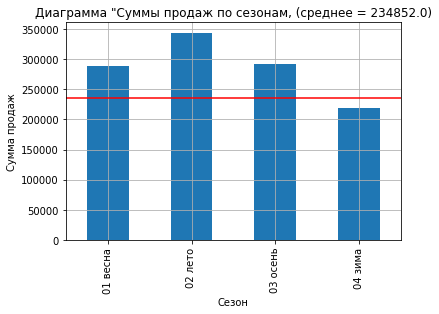

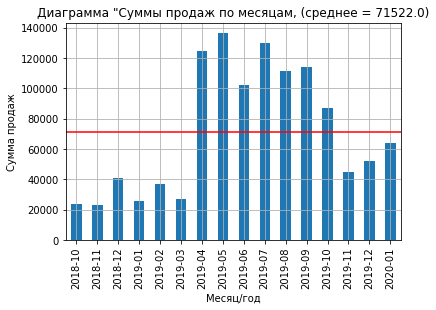

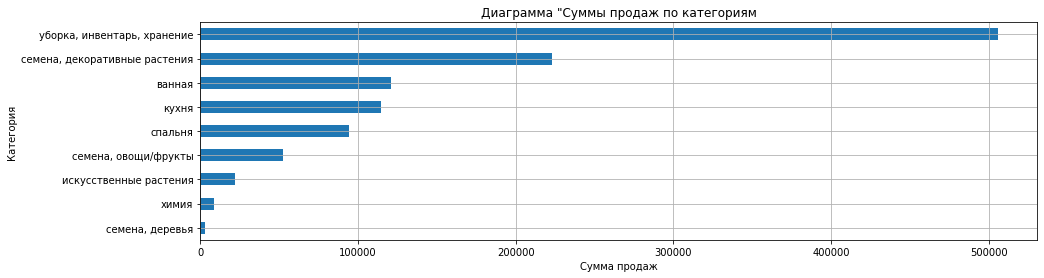

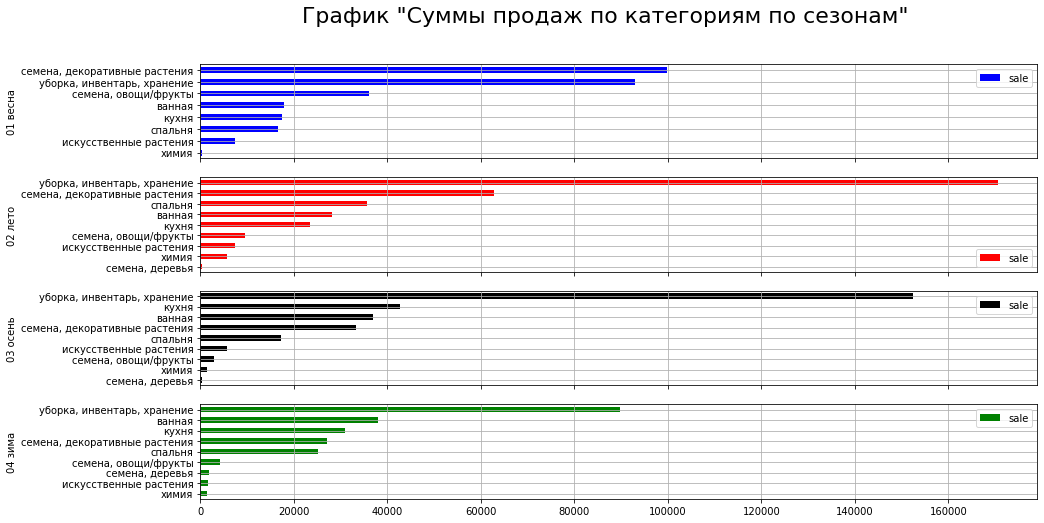

In [104]:
graph_first ('Растущие')
graph_second('Растущие')

**Вывод по разделу "Растущие"**

1. Средняя сумма продаж по сегменту "Растущие" в разрезе "по сезону" составляет 234 852,00 (на графике - красная линия)
2. Наибольшая сумма продаж - в летний сезон, наименьшая - в зимний
3. В разрезе продаж по месяцам средняя сумма продаж за месяц составляет 71 522,00 (на графике - красная линия)
4. ТОР-3 месяцев 
    - с наибольшими суммами продаж
        - 05.2019
        - 04.2019
        - 07.2019
    - с наименьшими суммами продаж
        - 11.2018
        - 10.2018
        - 01.2019
5. ТОР-3 по сумме продаж:
    - уборка, инвентарь, хранение;
    - семена, декоративные растения;
    - ванная.
6. По сезонам ТОР-3
    - весна:
      - семена, декоративные растения;
      - уборка, инвентарь, хранение;
      - семена, овощи/фрукты;
    - лето:
      - уборка, инвентарь, хранение;
      - семена, декоративные растения;
      - спальня;
    - осень:
      - уборка, инвентарь, хранение;
      - кухня;      
      - ванная;
    - зима:
      - уборка, инвентарь, хранение;     
      - ванная;
      - кухня

#### **Спящие**

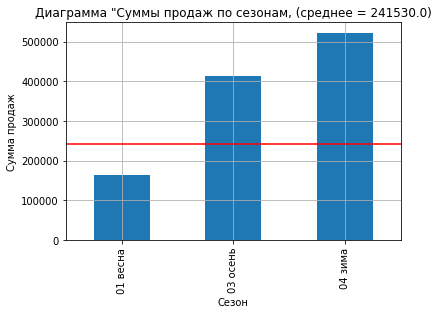

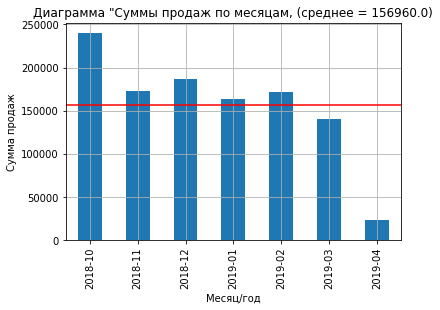

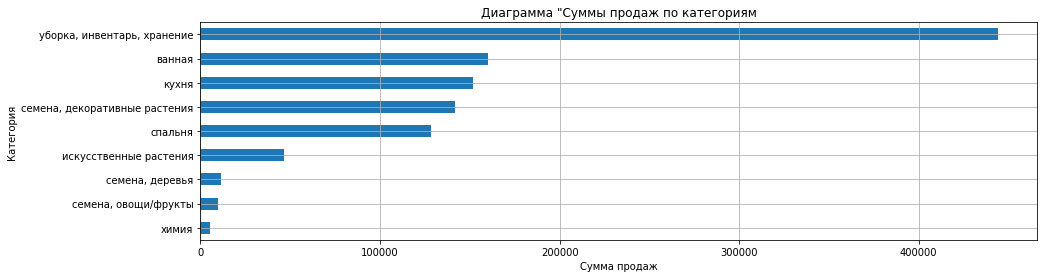

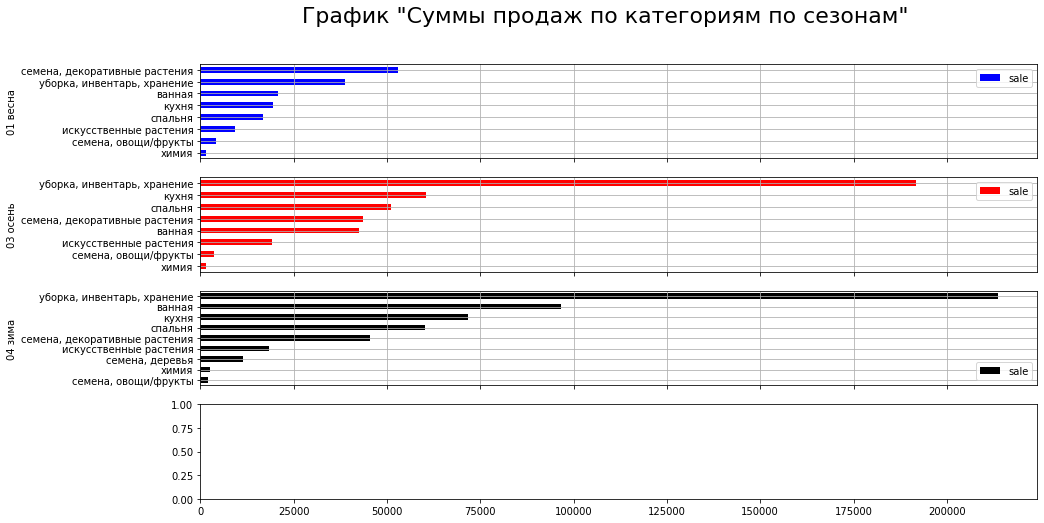

In [105]:
graph_first ('Спящие')
graph_second('Спящие')

**Вывод по разделу "Спящие"**

1. Средняя сумма продаж по сегменту "Спящие" в разрезе "по сезону" составляет 241 256,00 (на графике - красная линия)
2. Наибольшая сумма продаж - в зимний сезон, наименьшая - в весенний.
3. В связи с особеностью формирования сегмента - клиенты, у которых последняя покупка была совершенна очень давно, низкие показатели глубины чека и суммы покупок, - нет покупок, совершенных после 04.2019. Отсутствуют покупки в летний сезон. Соответственно покупки осени и зимы датированы 2018-начало 2019 года
4. В разрезе продаж по месяцам средняя сумма продаж за месяц составляет 156 764,00 (на графике - красная линия)
5. ТОР-3 месяцев 
    - с наибольшими суммами продаж
        - 10.2018
        - 12.2018
        - 02.2019
    - с наименьшими суммами продаж
        - 01.2019
        - 03.2019
        - 04.2019
6. ТОР-3 по сумме продаж:
    - уборка, инвентарь, хранение;
    - ванна;
    - кухня;
7. По сезонам ТОР-3
    - весна:
      - семена, декоративные растения;
      - уборка, инвентарь, хранение;
      - ванная;
    - осень:
      - уборка, инвентарь, хранение;
      - кухня;      
      - спальня;
    - зима:
      - уборка, инвентарь, хранение;     
      - ванная;
      - кухня

#### **Лояльные**

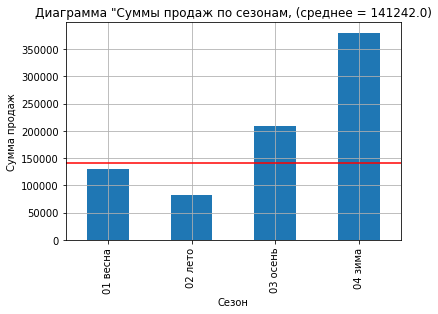

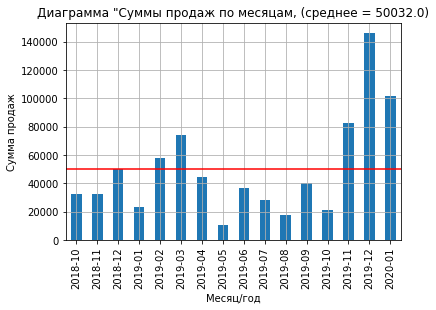

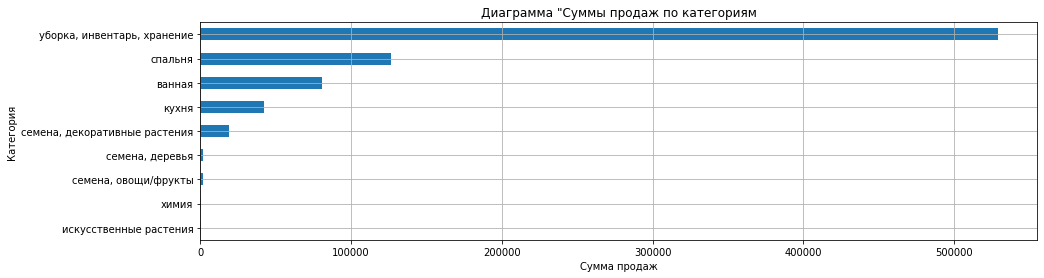

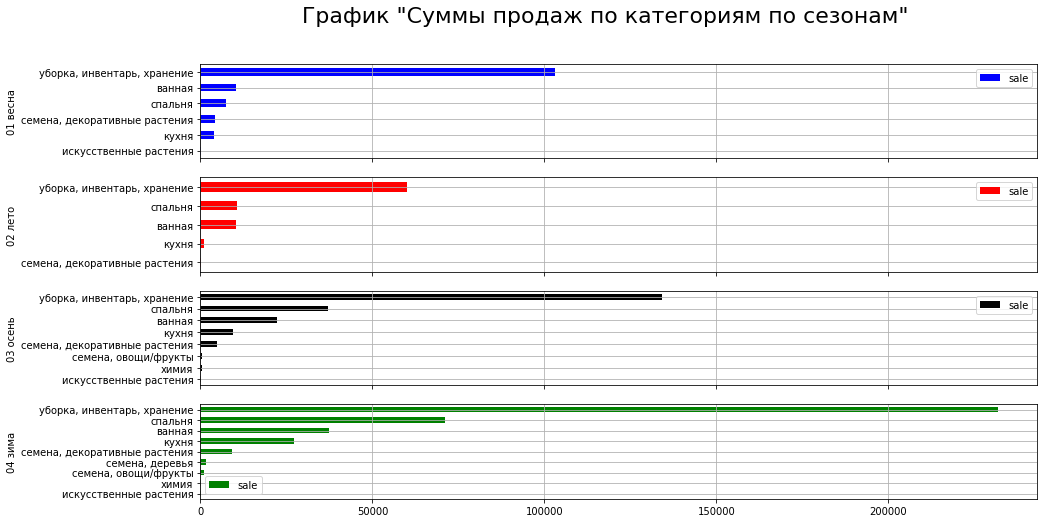

In [106]:
graph_first ('Лояльные')
graph_second('Лояльные')

**Вывод по разделу "Лояльные"**

1. Средняя сумма продаж по сегменту "Лояльные" в разрезе "по сезону" составляет 141 448,00 (на графике - красная линия)
2. Наибольшая сумма продаж - в зимний сезон, наименьшая - в летний
3. В разрезе продаж по месяцам средняя сумма продаж за месяц составляет 50 118,00 (на графике - красная линия)
4. ТОР-3 месяцев 
    - с наибольшими суммами продаж
        - 12.2019
        - 01.2020
        - 11.2019
    - с наименьшими суммами продаж
        - 05.2019
        - 08.2019
        - 10.2019
5. ТОР-3 по сумме продаж:
    - уборка, инвентарь, хранение;
    - спальня;
    - ванная.
6. По сезонам ТОР-3
    - весна:
      - уборка, инвентарь, хранение;
      - ванная;
      - спальня;
    - лето:
      - уборка, инвентарь, хранение;
      - спальня;
      - ванная;      
    - осень:
      - уборка, инвентарь, хранение;
      - спальня;
      - ванная; 
    - зима:
      - уборка, инвентарь, хранение;
      - спальня;
      - ванная

#### **Требуют внимание**

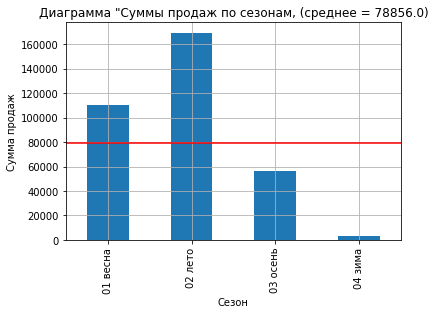

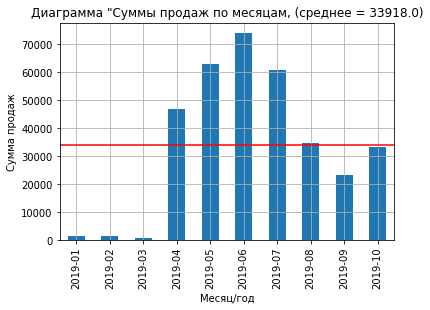

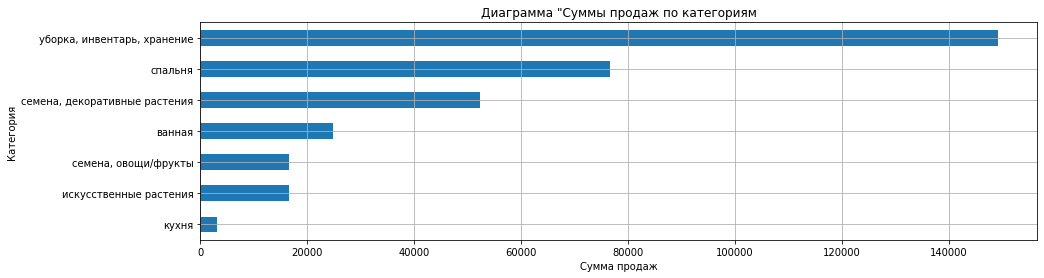

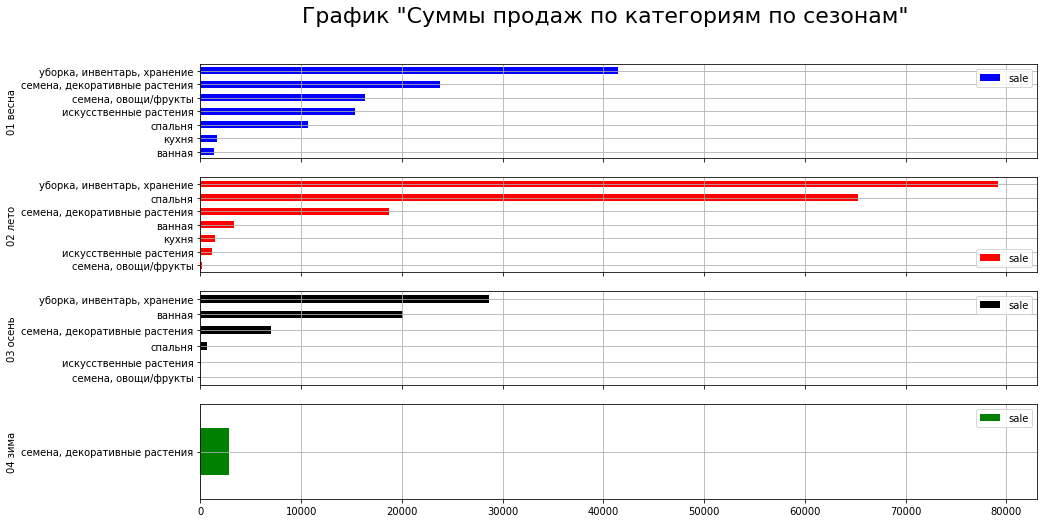

In [107]:
graph_first ('Требуют внимание')
graph_second('Требуют внимание')

**Вывод по разделу "Требуют внимание"**

1. Средняя сумма продаж по сегменту "Требуют внимание" в разрезе "по сезону" составляет 78 856,00 (на графике - красная линия)
2. Наибольшая сумма продаж - в летний сезон, наименьшая - в зимний
3. В разрезе продаж по месяцам средняя сумма продаж за месяц составляет 33 918,00 (на графике - красная линия)
4. ТОР-3 месяцев 
    - с наибольшими суммами продаж
        - 06.2019
        - 07.2019
        - 05.2019
    - с наименьшими суммами продаж
        - 03.2019
        - 02.2019
        - 01.2019
5. ТОР-3 по сумме продаж:
    - уборка, инвентарь, хранение;
    - спальня;
    - семена, декоративные растения;
6. По сезонам ТОР-3
    - весна:
      - уборка, инвентарь, хранение;
      - семена, декоративные растения;
      - искусственные растения;
    - лето:
      - уборка, инвентарь, хранение;
      - спальня;
      - семена, декоративные растения;      
    - осень:
      - уборка, инвентарь, хранение;
      - ванная; 
      - семена, декоративные растения;
    - зима:
      - семена, декоративные растения;
      - уборка, инвентарь, хранение;

#### **Новички**

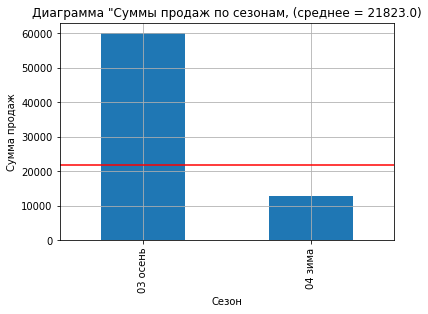

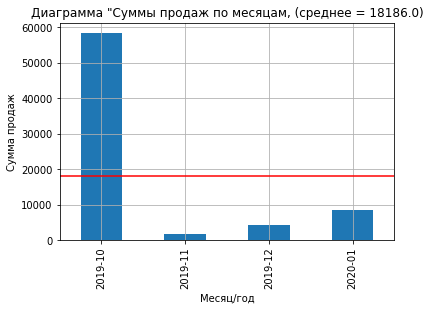

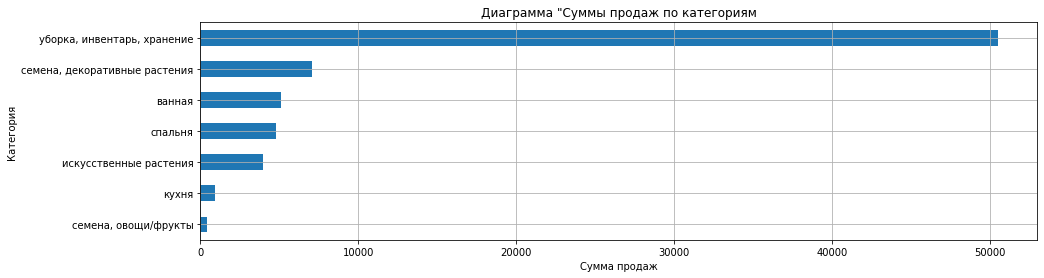

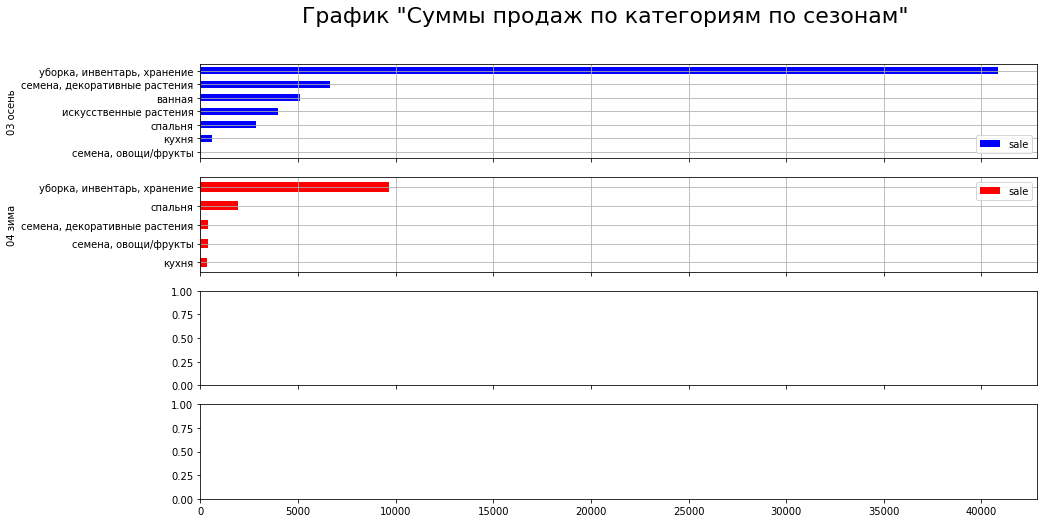

In [108]:
graph_first('Новички')
graph_second('Новички')

**Вывод по разделу "Новички"**

1. Средняя сумма продаж по сегменту "Новички" в разрезе "по сезону" составляет 21 823,00 (на графике - красная линия)
2. Наибольшая сумма продаж - в осенний сезон, наименьшая - в зимний
3. В разрезе продаж по месяцам средняя сумма продаж за месяц составляет 18 186,00 (на графике - красная линия)
3. ТОР-3 по сумме продаж:
    - уборка, инвентарь, хранение;
    - семена, декоративные растения;
    - ванная

#### **В зоне риска**

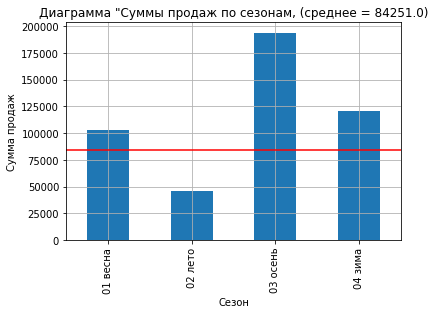

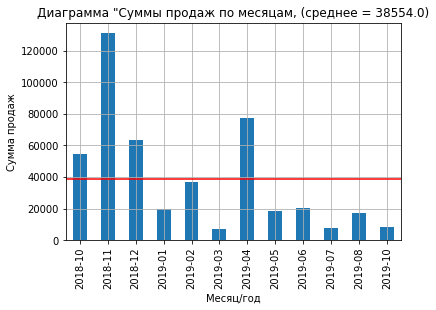

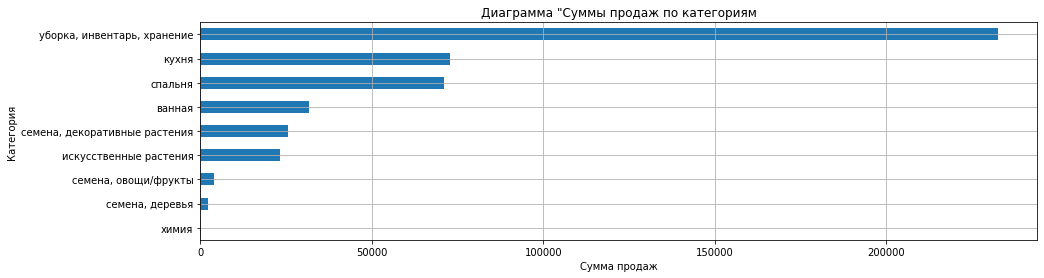

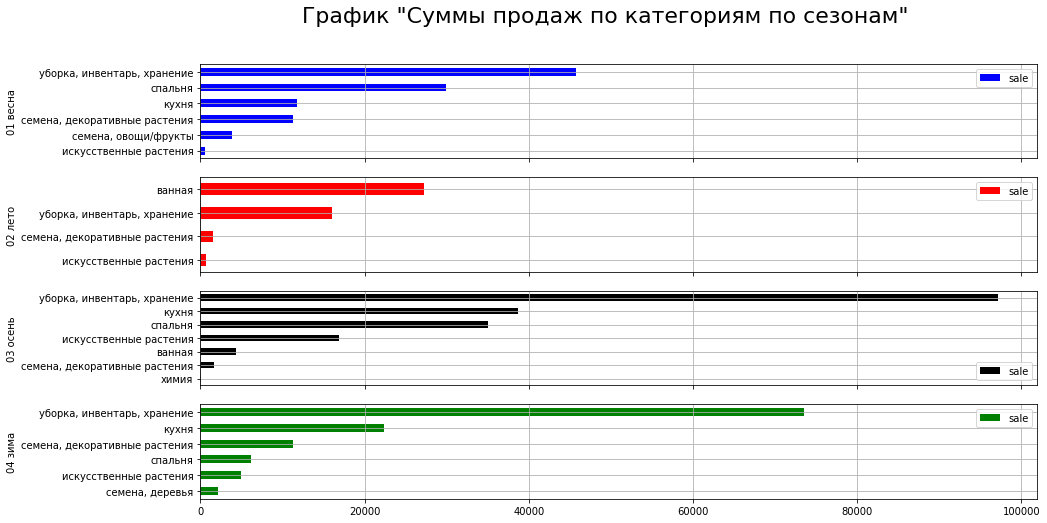

In [109]:
graph_first('В зоне риска')
graph_second('В зоне риска')

**Вывод по разделу "В зоне риска"**

1. Средняя сумма продаж по сегменту "В зоне риска" в разрезе "по сезону" составляет 84 251,00 (на графике - красная линия)
2. Наибольшая сумма продаж - в осенний сезон, наименьшая - в летний
3. В разрезе продаж по месяцам средняя сумма продаж за месяц составляет 38 554,00 (на графике - красная линия)
4. ТОР-3 месяцев 
    - с наибольшими суммами продаж
        - 11.2018
        - 04.2019
        - 12.2018
    - с наименьшими суммами продаж
        - 03.2019
        - 06.2019
        - 10.2019
5. ТОР-3 по сумме продаж:
    - уборка, инвентарь, хранение;
    - кухня;
    - спальня;
6. По сезонам ТОР-3
    - весна:
      - уборка, инвентарь, хранение;
      - спальня
      - кухня;
    - лето:
      - ванная;  
      - уборка, инвентарь, хранение;
      - семена, декоративные растения;      
    - осень:
      - уборка, инвентарь, хранение;
      - кухня;
      - спальня;
    - зима:
      - уборка, инвентарь, хранение;
      - кухня;
      - семена, декоративные растения;

### **Общий вывод по разделу "RFM-анализ"**
1. Решение основной задачи исследования - сегментирования покупателей на основе истории их покупок, был выбран реализовано при помощи методики "RFM-анализ".

*! RFM-анализ — метод анализа, позволяющий сегментировать клиентов по частоте и сумме покупок и выявлять тех, которые приносят больше денег*

*Аббревиатура RFM расшифровывается:*

- *Recency — давность (как давно ваши клиенты совершали покупку). Высокий показатель давности означает, что у клиента уже сложилось достаточно хорошее впечатление о вашем бренде, поэтому он недавно посещал вас. Давность в срезе клиентской базы можно посмотреть, если отсортировать клиентов по дате последней покупки.*
- *Frequency — частота (как часто они у вас покупают). Высокий показатель частоты говорит о том, что клиенту нравится ваш бренд, ваши товары и услуги, поэтому он часто к вам возвращается.
- *Monetary — деньги (общая сумма трат). Высокий уровень этого показателя означает, что клиенту нравится тратить именно у вас*

2. Датой от которой рассчитывается давность покупки была выбрана дата, следующая после конечной даты представленного датафрейма - 01.02.2020

3. При сегментации клиентов
    - Recency - была использована функция qcut()
    - Monetary и Frequency была учтена неравномерность распределения показателей, применялся закон Парето

4. Использовалась трёхбальная шкала, где:
    - 3 - хорошо, 
    - 2 - нормально
    - 1 - плохо
5. Полученные 24 сегмента, для удобства анализа были масштабированы в 6 сегментов:
    - Лояльные.	Делают частые покупки на крупные суммы
    - Требуют внимание.	Уровень давности выше среднего, частота и сумма покупок на на среднем уровне. Могут не совершать покупки в последнее время
    - Растущие.	Недавно покупали, но не крупные суммы
    - В зоне риска. Ранее часто тратили большие суммы, но давно не были у вас
    - Новички. В последнее время совершали покупки, необязательно крупные. Низкий уровень частоты и суммы покупок, т.к. они тольк онедавно заметили ваш бренд
    - Спящие. Последняя покупка была очень давно, так же низкие чек и кол-во покупок

6. Распределение сегментов по количеству клиентов:
    - Растущие	1219 чел.	50.54%
    - Спящие	 767 чел.	31.80%
    - Лояльные	193 чел.	8.00%
    - Требуют внимание	95 чел.	3.94%
    - Новички	81 чел.	3.36%
    - В зоне риска	57чел.	2.36%

7. Для каждого сегмента были проверены две гипотезы:
    - Гипотеза №1 "Средний чек"
        - Н0 ="Величина среднего чека в сегментах возможно НЕ РАЗЛИЧАЕТСЯ"
        - Н1 ="Величина среднего чека в сегментах возможно различается"
    - Гипотеза №2 "Объем продаж"
        - Н0 ="Объем продаж в категориях сегментах НЕ РАЗЛИЧАЕТСЯ"
        - Н1 ="Объем продаж в категориях сегментах различается"

8. Нормальность распределения сегментов были проверены при помощи критерия Шапиро-Уилка. Проверка показала, что распределение сегментов является не нормальным

9. Исходя из того, что будут проверяться одни и те же данные (множественный тест), для избежания возникновения ошибки первого рода, была применена поправка Бонферрони. 

10. Проверка гипотезы проводилась непараметрическим тестом Уилкоксона-Манна-Уитни. Всего было проведено 15 попарных проверок, в результате которых было получены следующие данные:
    - Гипотеза №1 = Н0 / Гипотеза №2 = Н0 - 0 совпадений
    - Гипотеза №1 = Н1 / Гипотеза №2 = Н0 - 4 совпадения
    - Гипотеза №1 = Н0 / Гипотеза №2 = Н1 - 3 совпадения
    - Гипотеза №1 = Н1 / Гипотеза №2 = Н1 - 8 совпадений

11. Исходя из того, что нет пары сегментов, у которых верными оказались одновременно нулевые гипотезы, можно говорить о корректности разделения сегментов

12. Были проанализированы категорийные продажи в разрезе сегментов по сезонным продажам (весна, лето, осень, зима), а так же в разрезе месяцев

13. На основании такого разделения внутри сегментов были выделены категории товаров, лидеры продаж в целом за исследуемый период, а так же по сезонно.

14. Полученные выводы позволят составить подробные описания по клиентским сегментам и товарным категориями, а так же сформировать рекомендации и выводы по маркетинговым активностям